In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

In [3]:
src_scrp = r"M:\09_MyApps\020_Scripts\pyscripts-common\ml-helpers"
sys.path.insert(0, src_scrp)

import data_explore as de
import utils

# Load Data

In [4]:
src_data = r"../data/working"

df_train = pd.read_csv(os.path.join(src_data, 'train.csv'))
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Check missing data

In [6]:
df_col_miss, _ = de.list_missing_data_cols(df_train)


List of columns with missing data:


Total Number of Data (Rows):                  1460
Total Number of Columns with Missing Data:    19
Total Number of Columns:                      81

PoolQC :  1453
MiscFeature :  1406
Alley :  1369
Fence :  1179
FireplaceQu :  690
LotFrontage :  259
GarageType :  81
GarageYrBlt :  81
GarageFinish :  81
GarageQual :  81
GarageCond :  81
BsmtExposure :  38
BsmtFinType2 :  38
BsmtQual :  37
BsmtCond :  37
BsmtFinType1 :  37
MasVnrType :  8
MasVnrArea :  8
Electrical :  1



In [7]:
df_col_miss

,count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


# Define columns type

In [8]:
columns = df_train.columns

de.report_unbalance_cols(df_train, columns, thresh = 90)

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [9]:
cols_cat_obj, shares_all = de.identify_cat_cols(df_train, columns, thresh=2)

In [10]:
pd.DataFrame(cols_cat_obj)

,name,per
0,MSSubClass,1.027397
1,MSZoning,0.342466
2,Street,0.136986
3,Alley,0.205479
4,LotShape,0.273973
...,...,...
56,MiscVal,1.438356
57,MoSold,0.821918
58,YrSold,0.342466
59,SaleType,0.616438


In [11]:
cols_cat = list(map(lambda c: c['name'], cols_cat_obj))
cols_cat

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [12]:
cols_remain = list(set(df_train.columns) - set(cols_cat))
cols_remain

['WoodDeckSF',
 'BsmtFinSF1',
 'GrLivArea',
 'MasVnrArea',
 'GarageArea',
 'LotArea',
 '1stFlrSF',
 'Id',
 'BsmtFinSF2',
 'ScreenPorch',
 'YearRemodAdd',
 'EnclosedPorch',
 'BsmtUnfSF',
 'GarageYrBlt',
 'TotalBsmtSF',
 'LotFrontage',
 '2ndFlrSF',
 'OpenPorchSF',
 'YearBuilt',
 'SalePrice']

In [13]:
label = 'SalePrice'
cols_meta = ['Id']
cols_nums = list(set(cols_remain) - set(cols_meta) -set([label]))
cols_nums

['WoodDeckSF',
 'BsmtFinSF1',
 'GrLivArea',
 'LotFrontage',
 'MasVnrArea',
 'GarageArea',
 'LotArea',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF2',
 'OpenPorchSF',
 'ScreenPorch',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'EnclosedPorch',
 'BsmtUnfSF',
 'GarageYrBlt']

# Explore Data

In [14]:
utils.set_matplotlib_font_size(SMALL_SIZE=14, MEDIUM_SIZE=16, BIGGER_SIZE=18)

## Plot Sales Price vs Categorical Columns

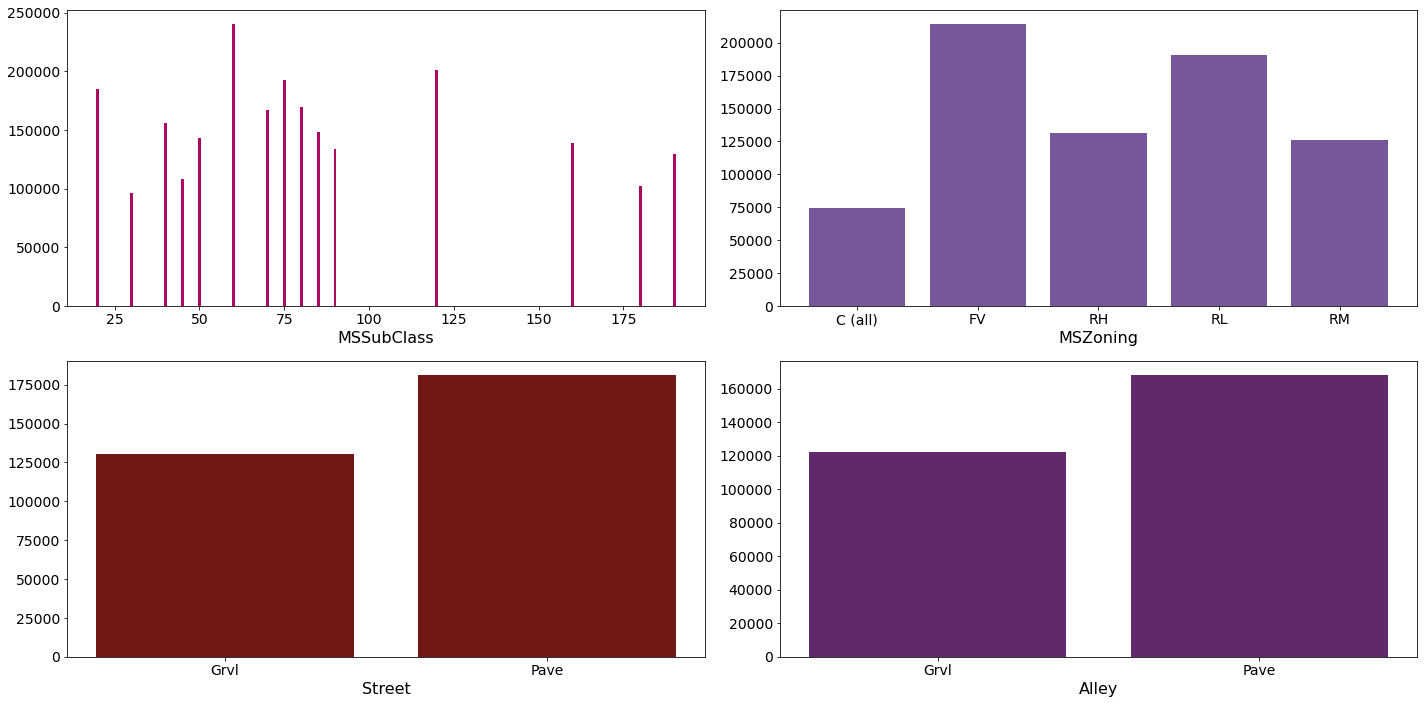

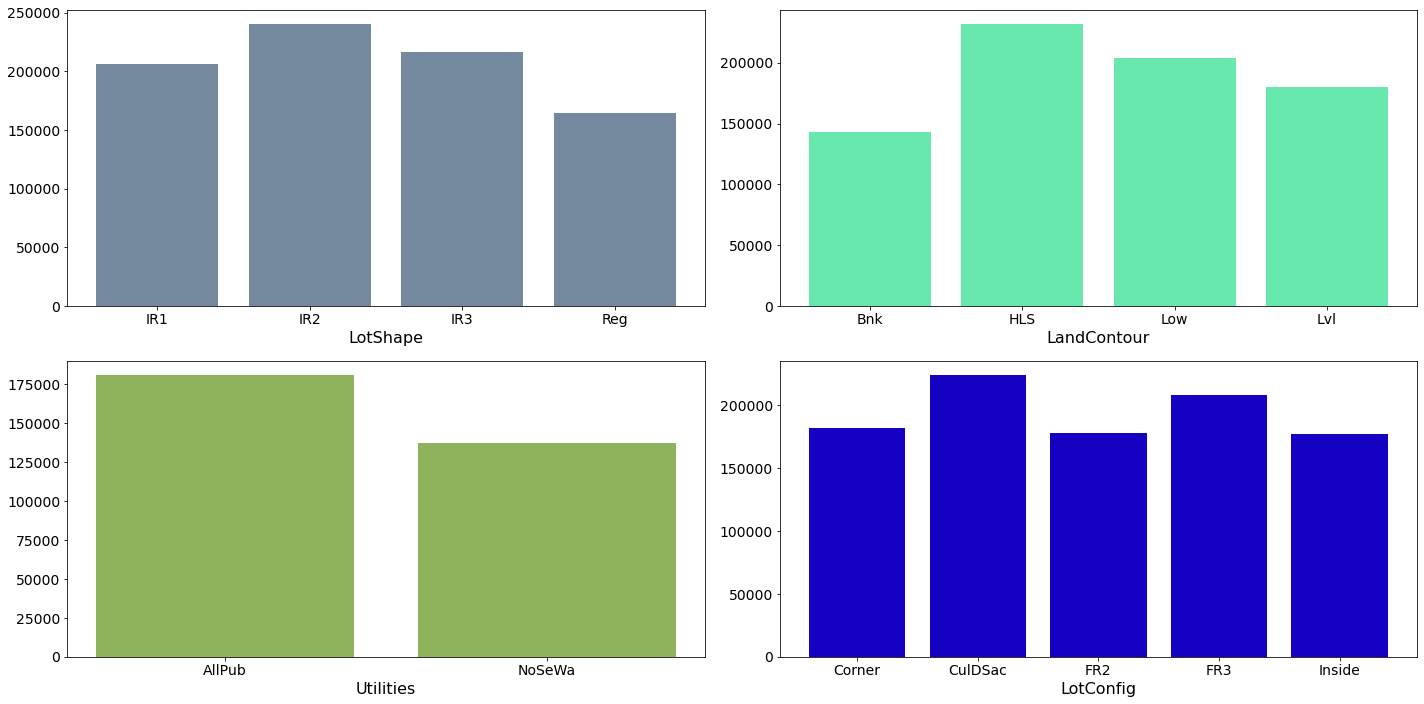

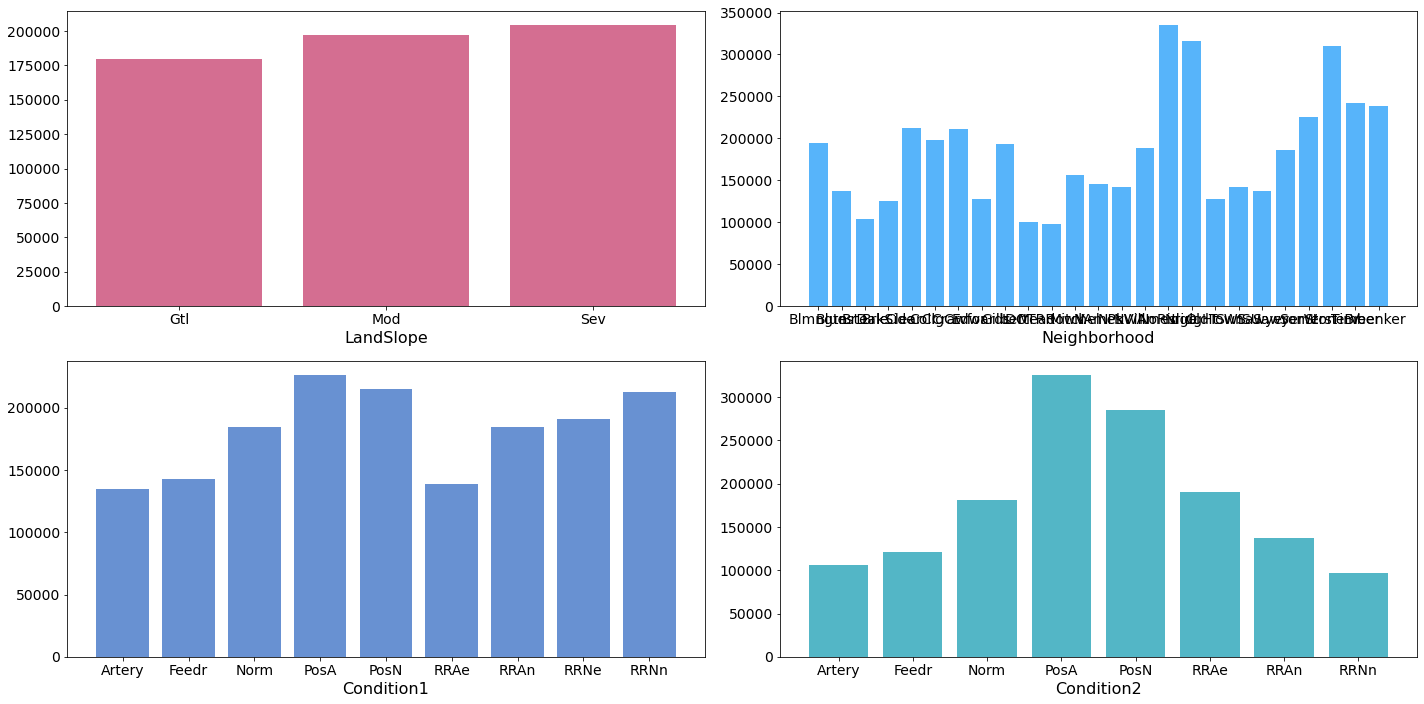

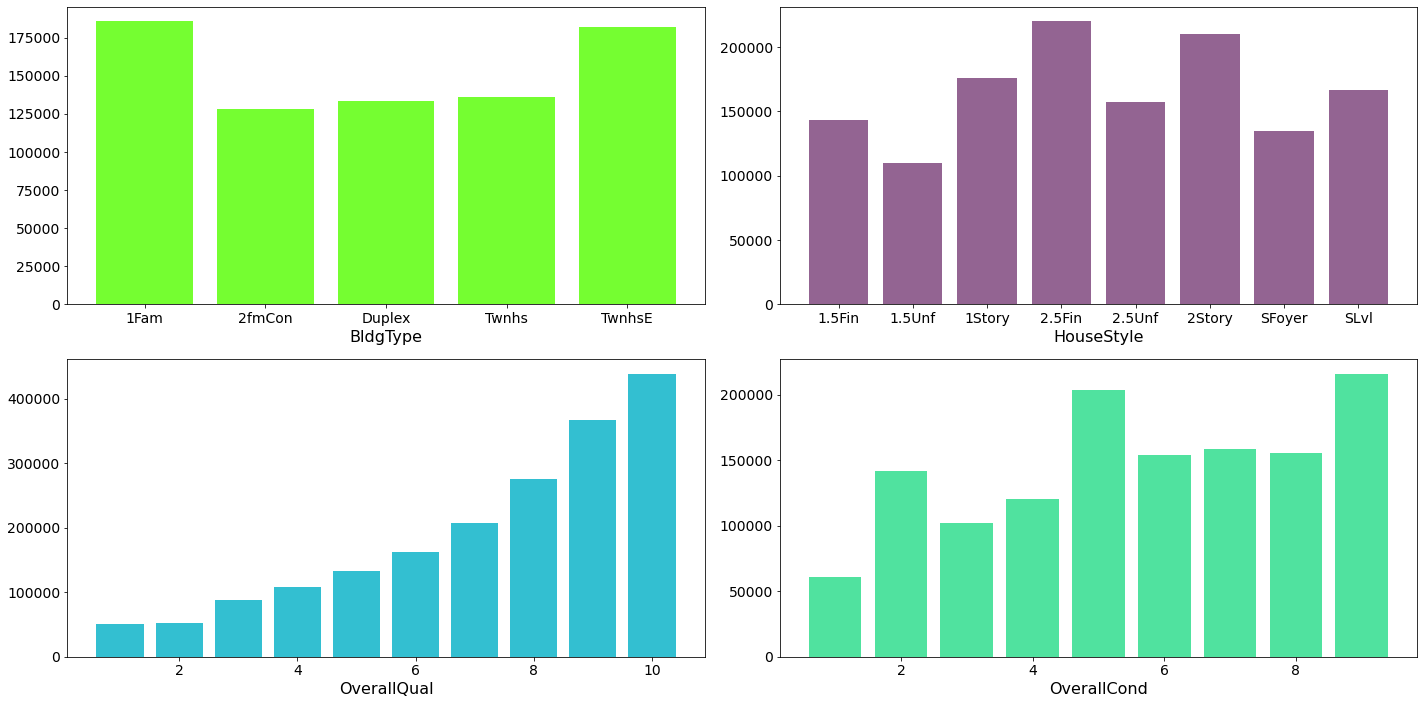

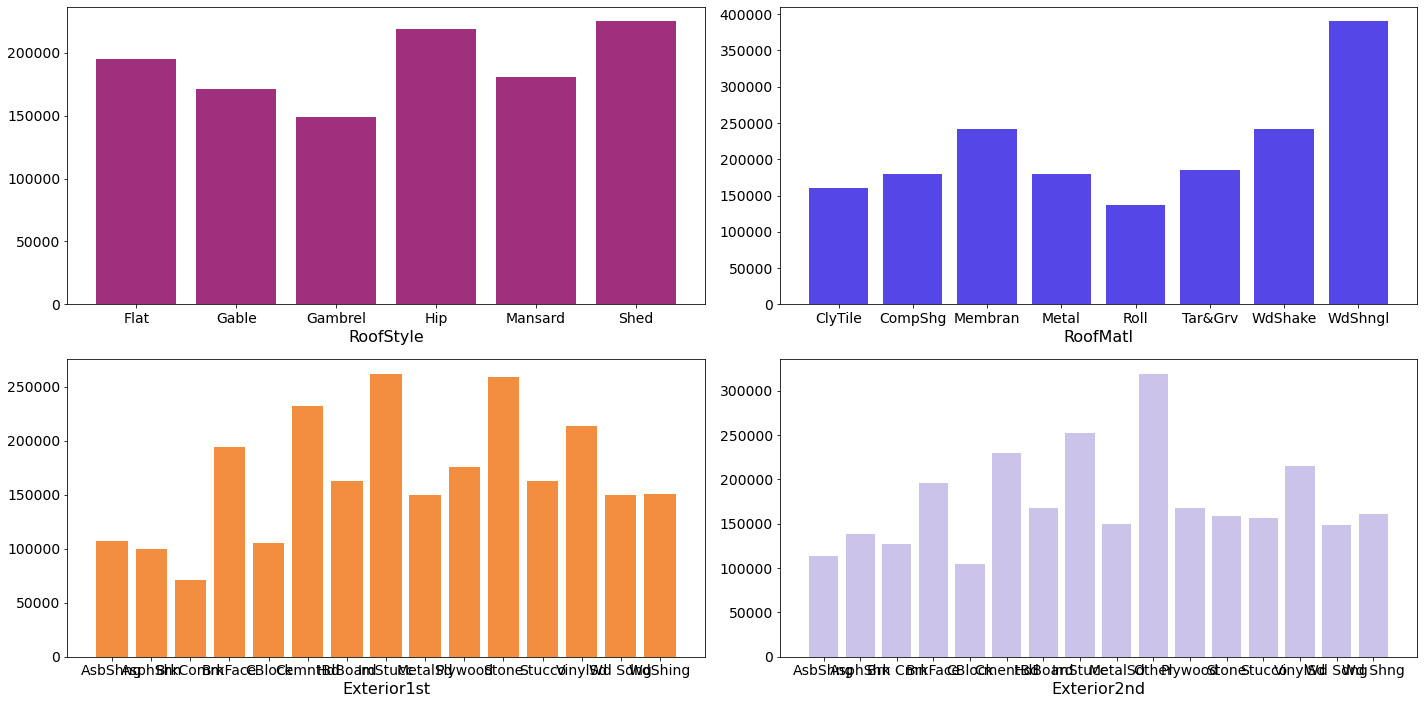

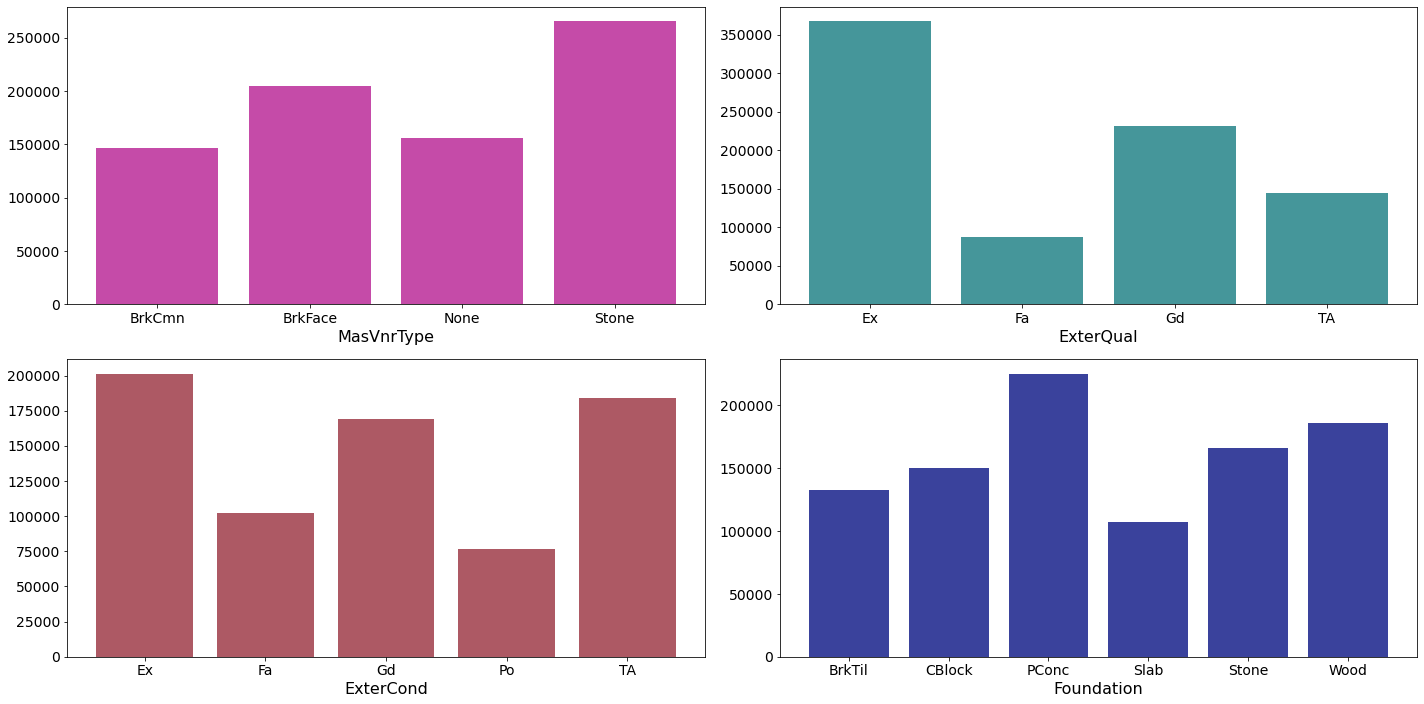

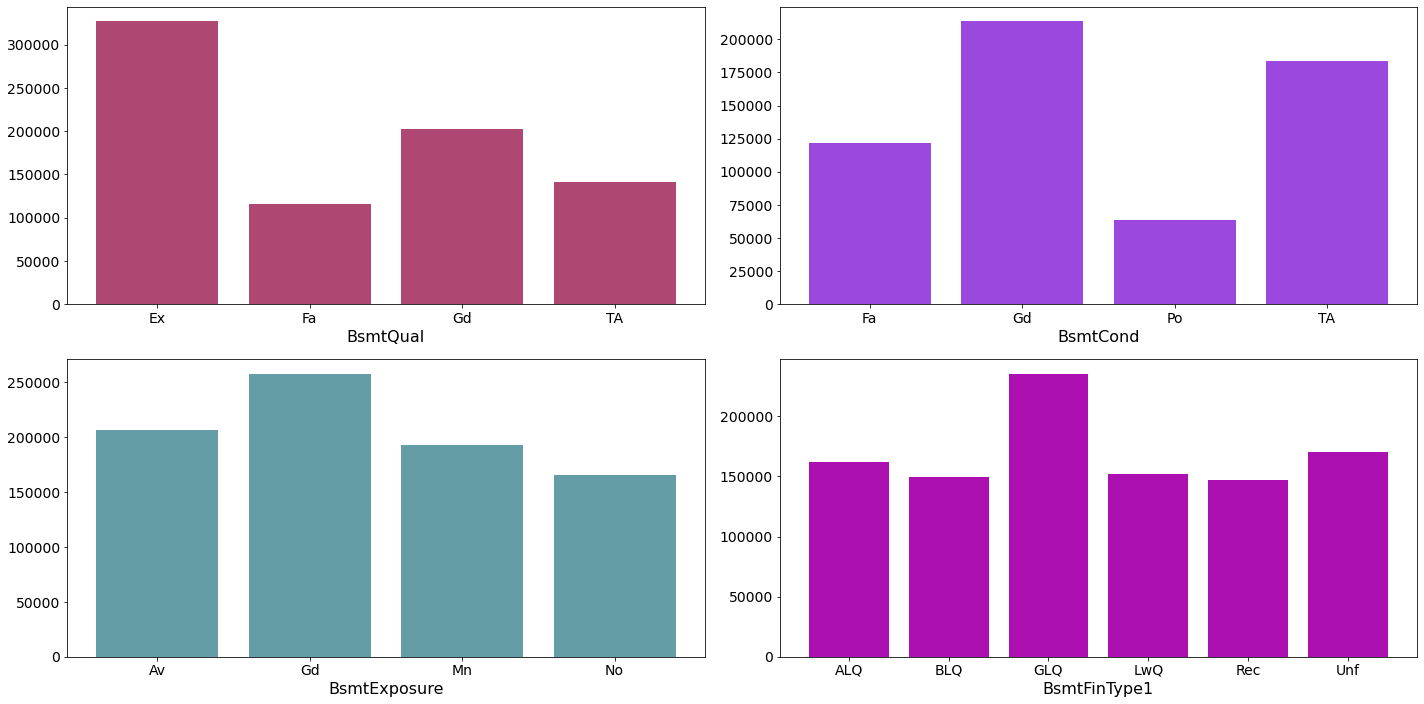

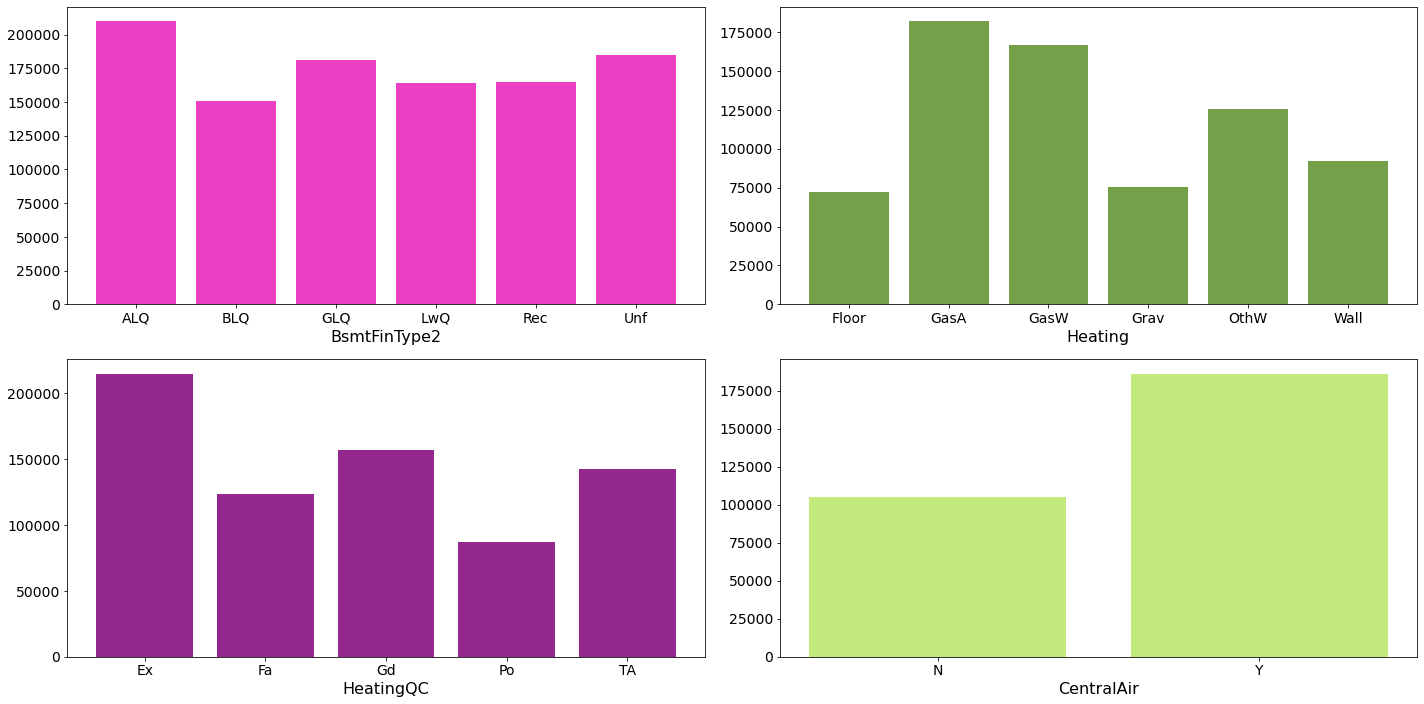

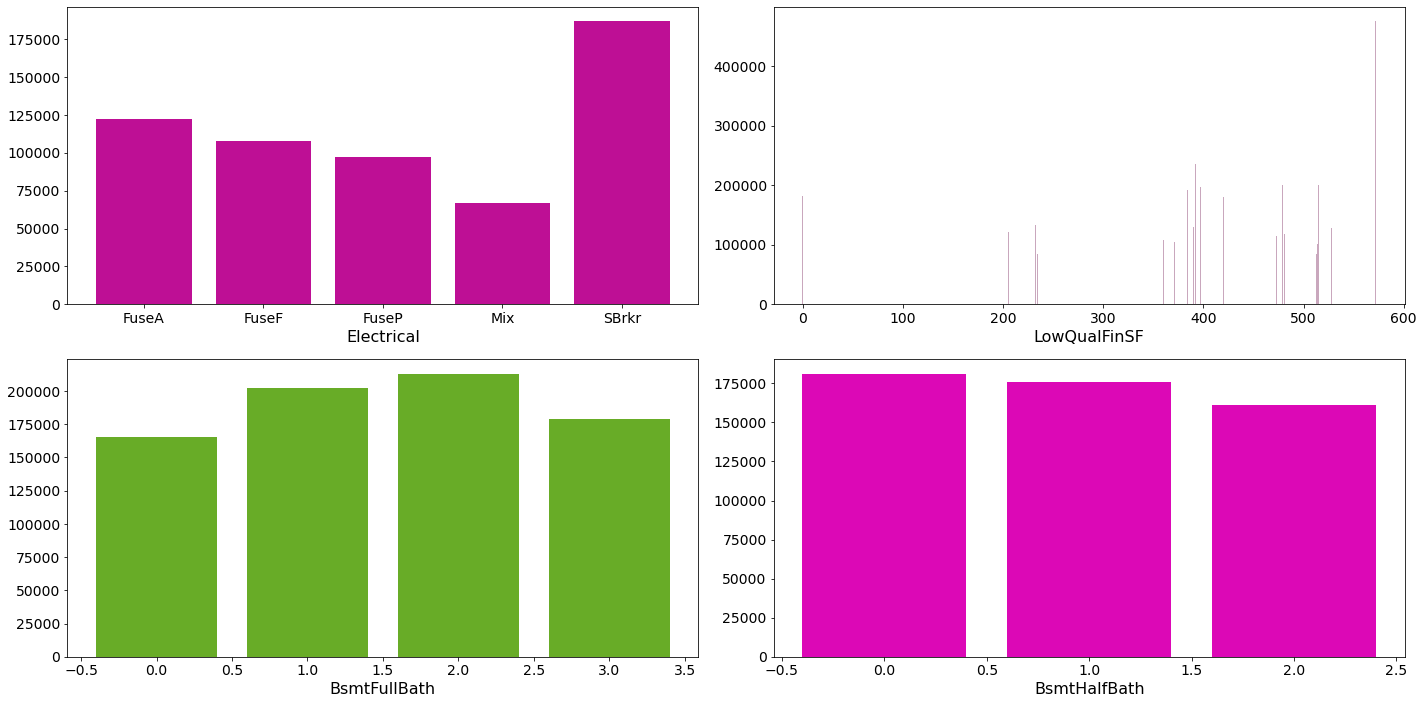

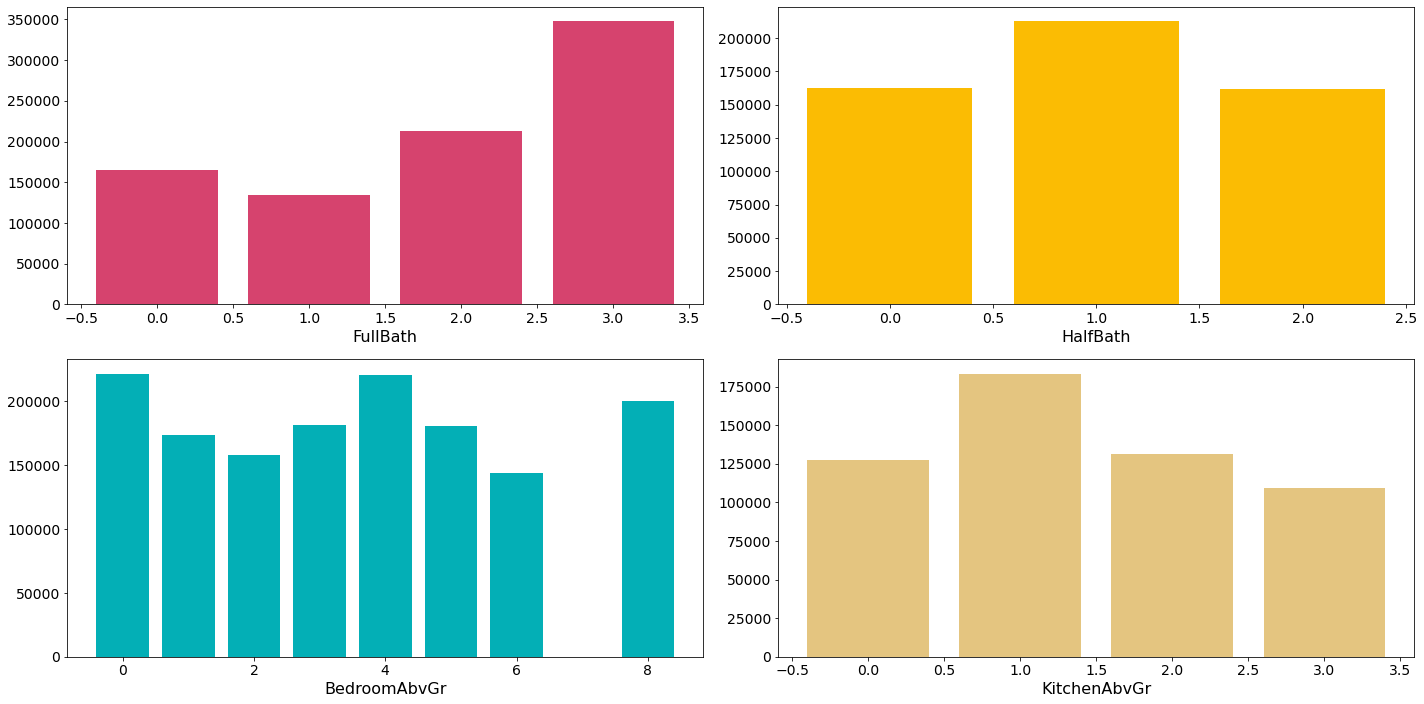

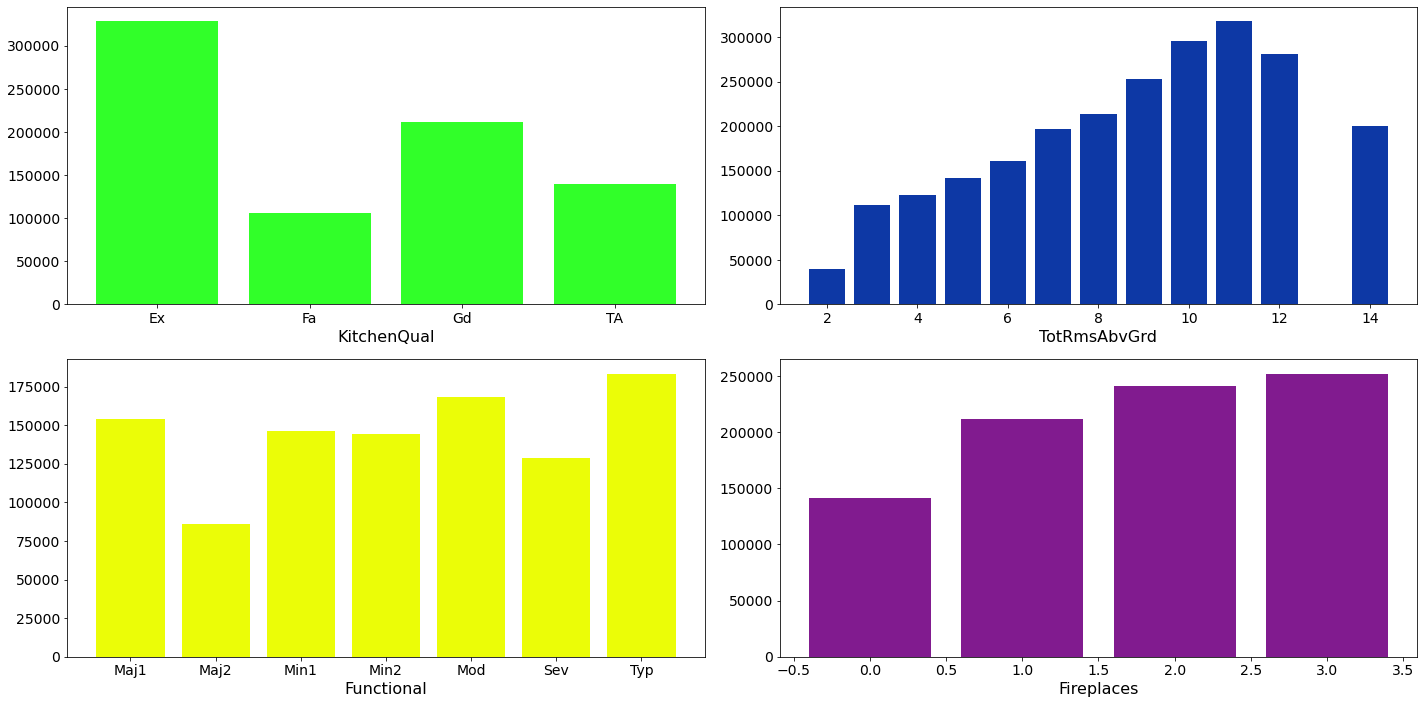

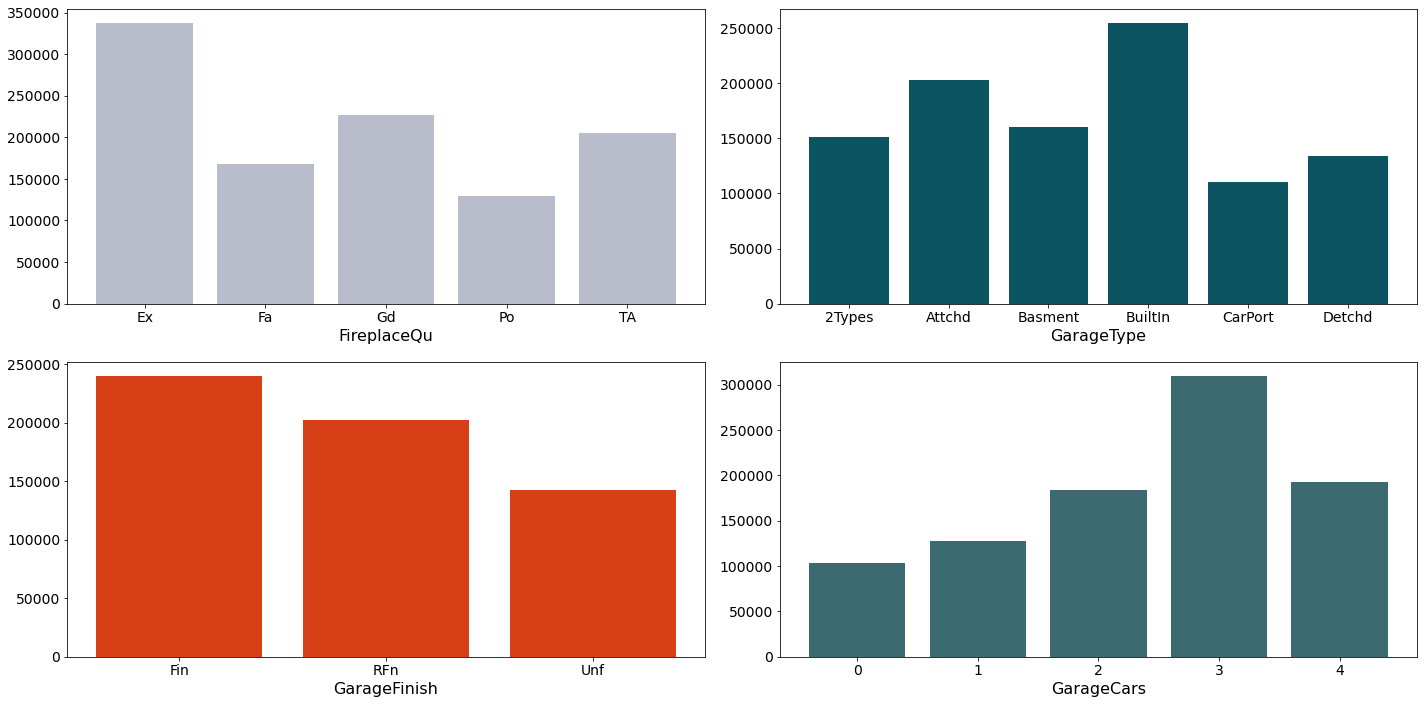

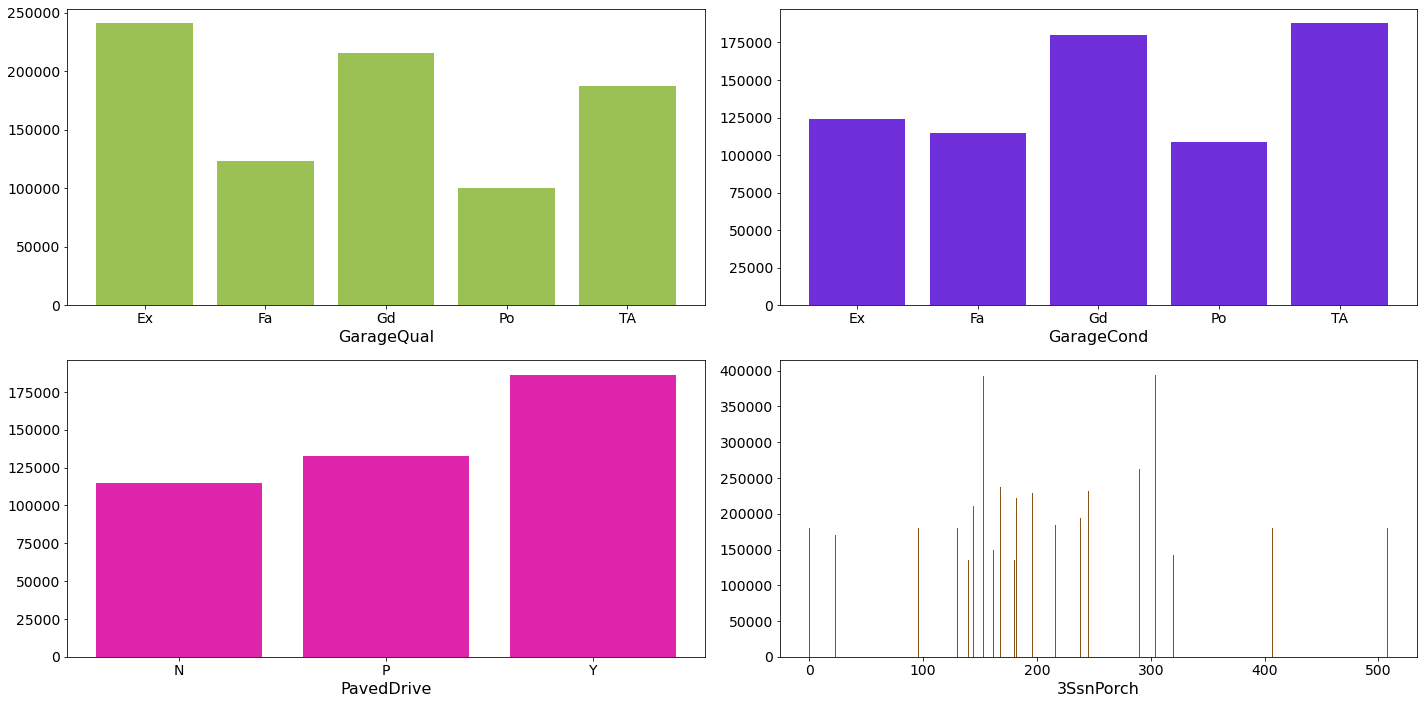

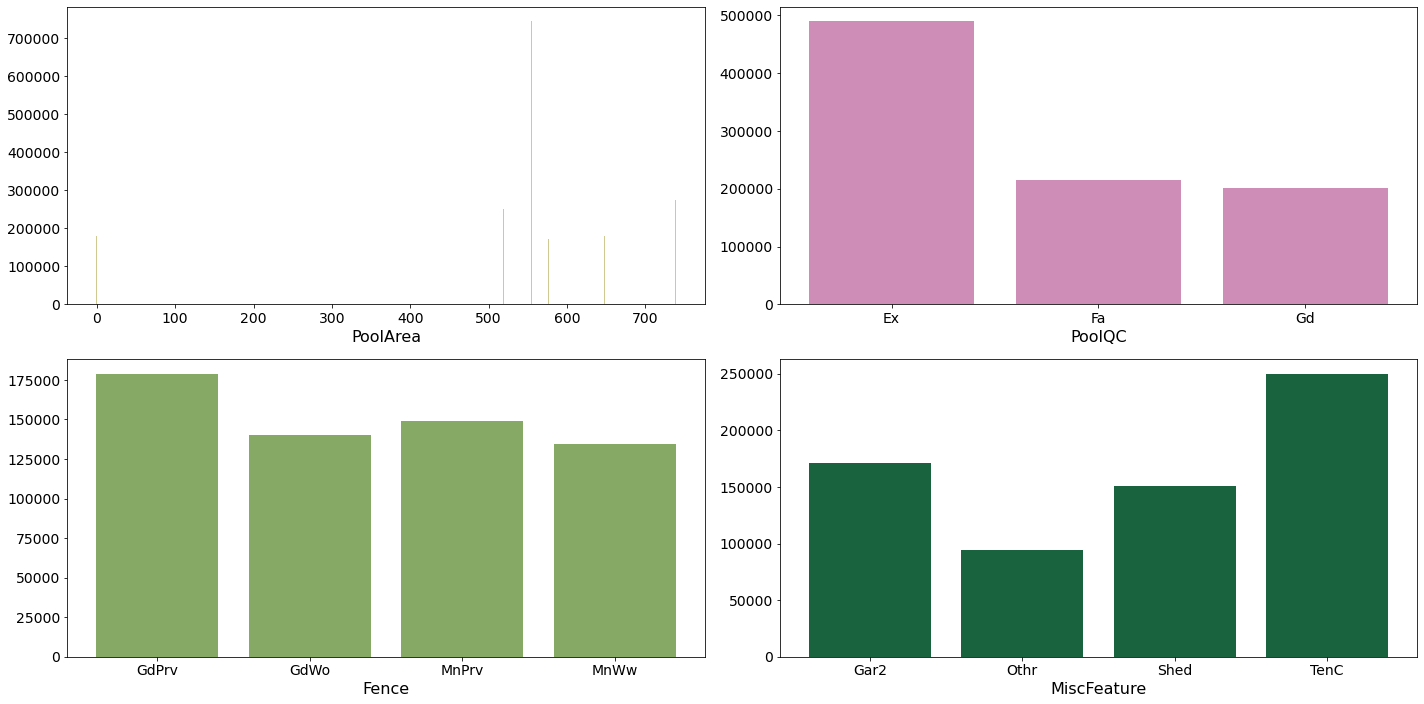

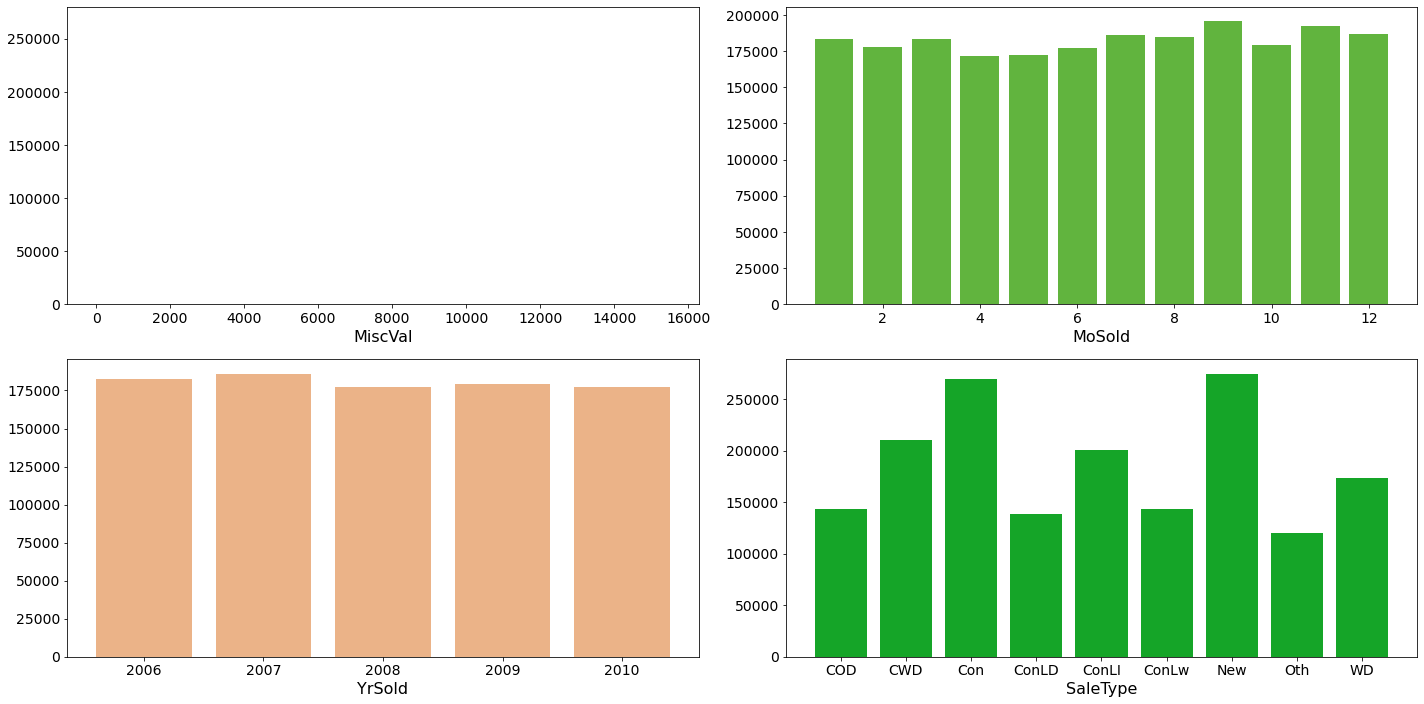

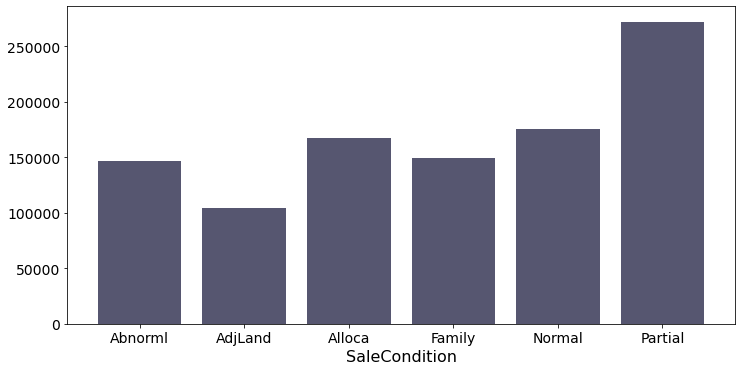

In [15]:
figsize = (20,10)

de.barChart_label_vs_cat_feats(
    df_train,
    cols_cat,
    label,
    figsize=figsize,
    nrows=2,
    ncols=2
)


## Simple Scatter Plot

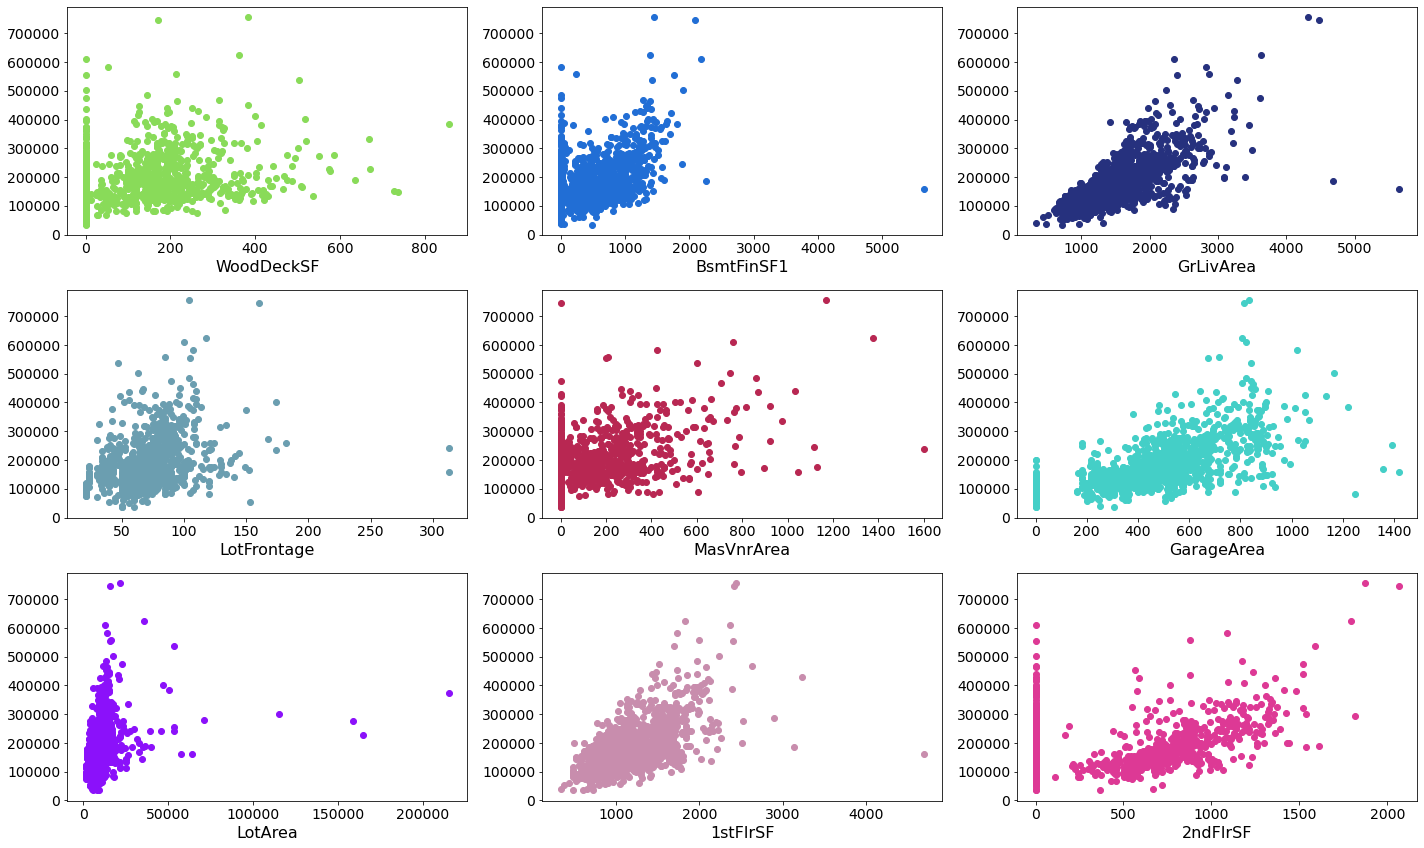

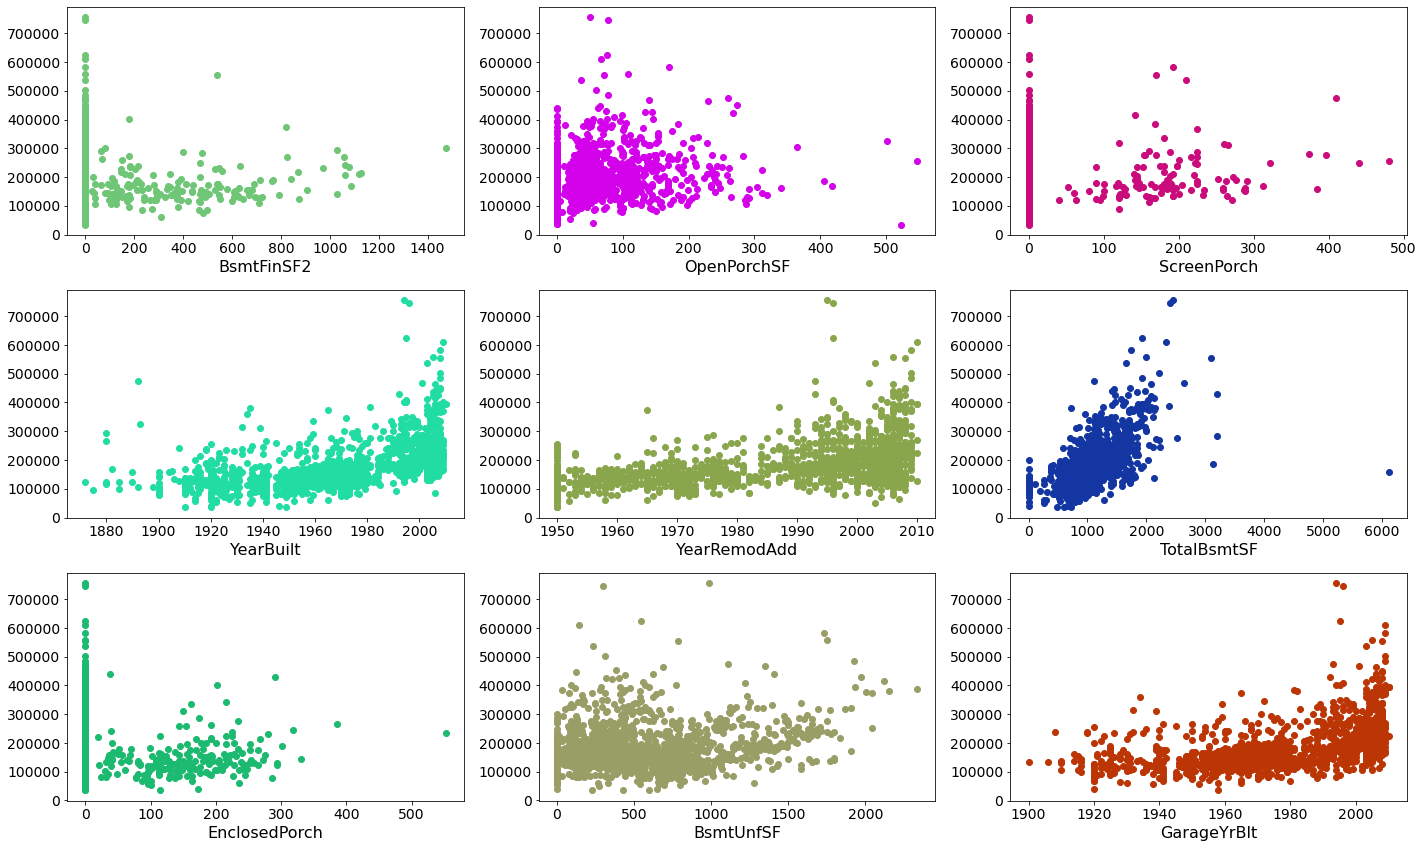

In [16]:
de.scatter_label_vs_features(
    df_train,
    cols_nums,
    label,
    nrows=3,
    ncols=3
)

In [77]:
df_train_intense = de.table_color_intense(df_train, cols = None, nrows = 30, back_color="green")
df_train_intense

# Hist of features

## Numerics

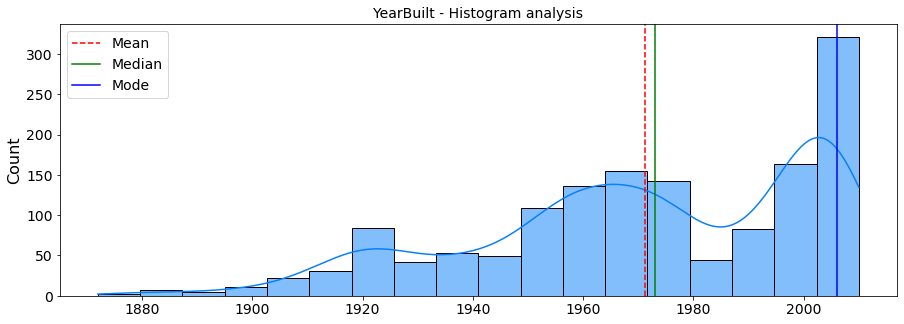

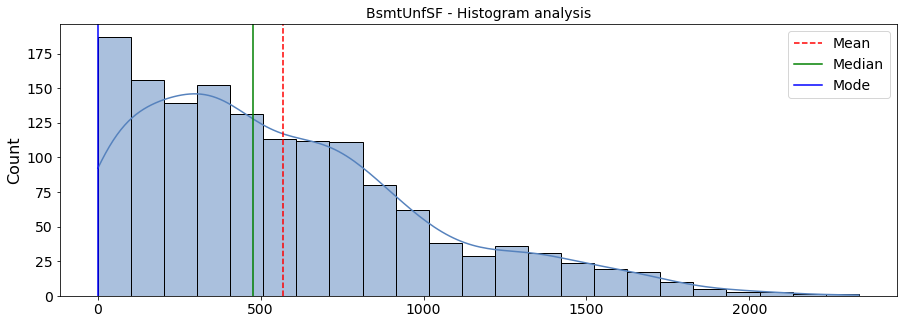

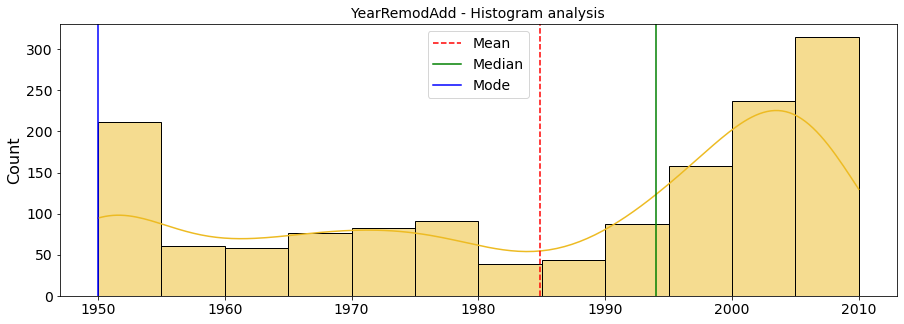

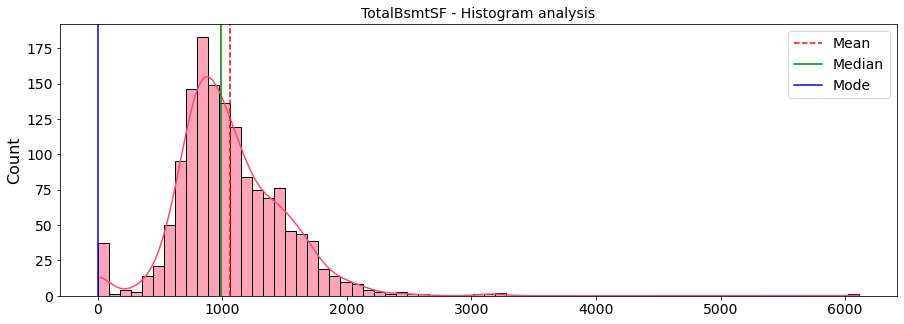

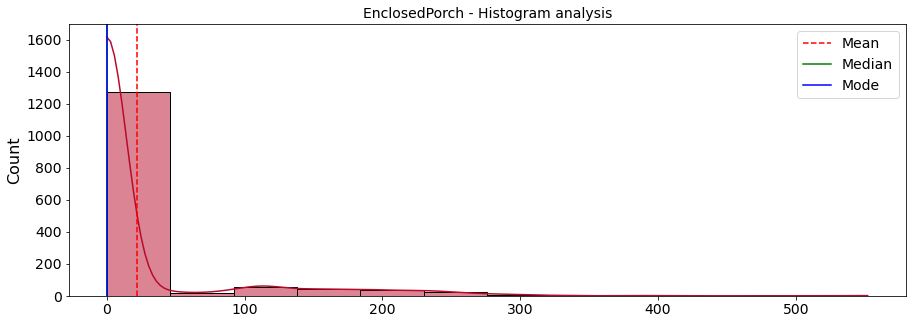

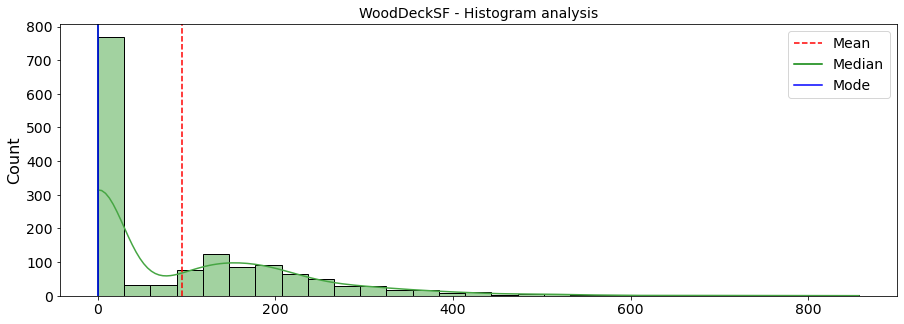

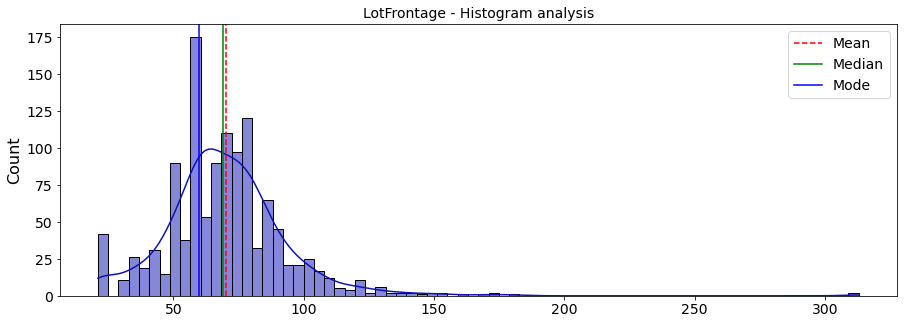

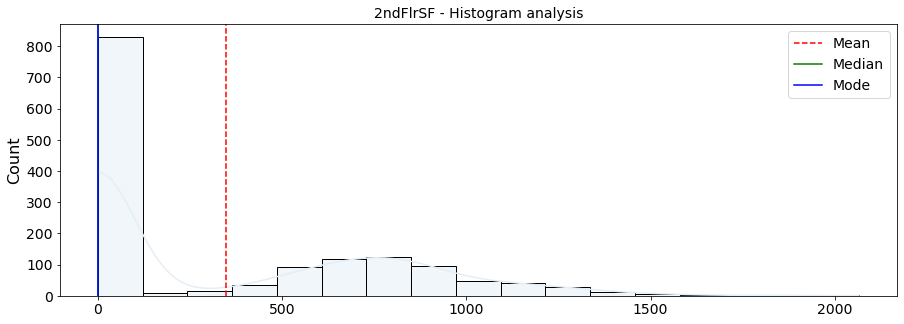

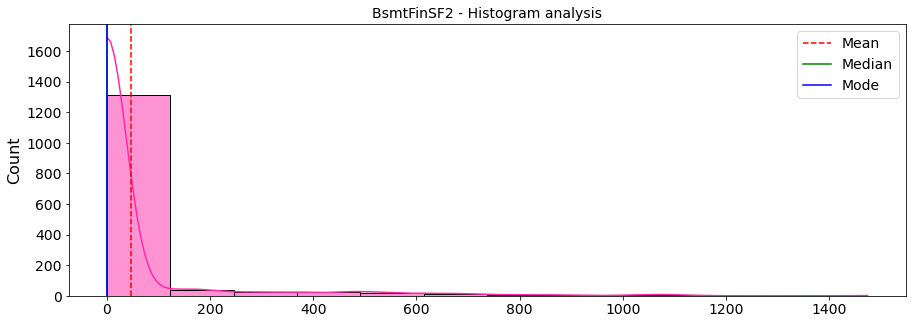

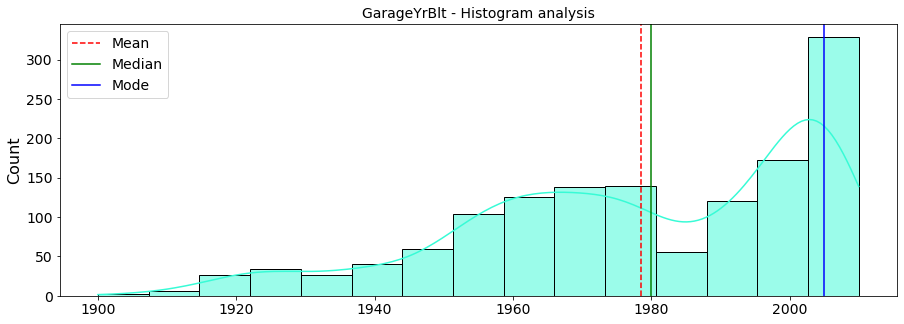

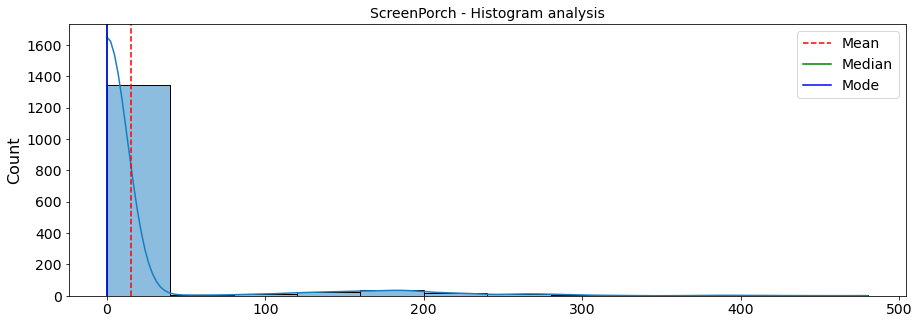

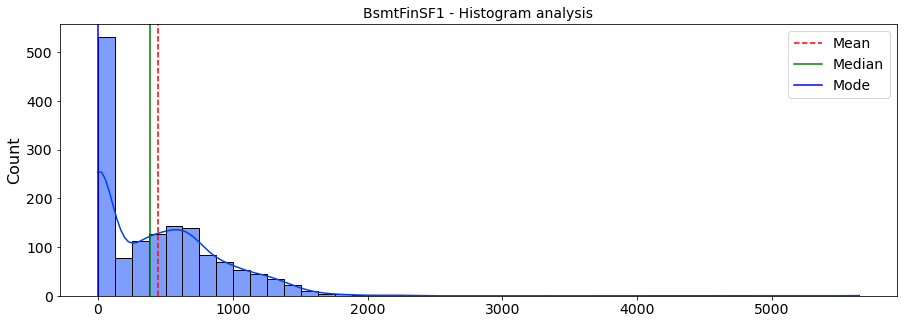

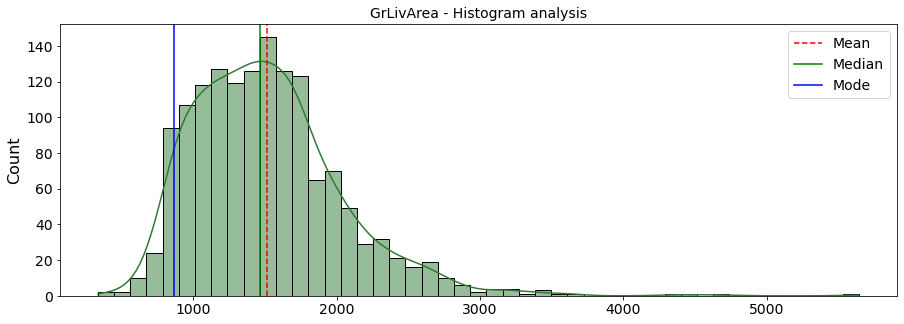

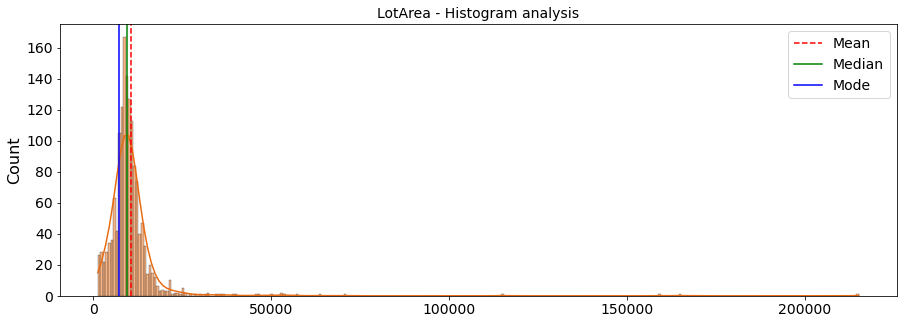

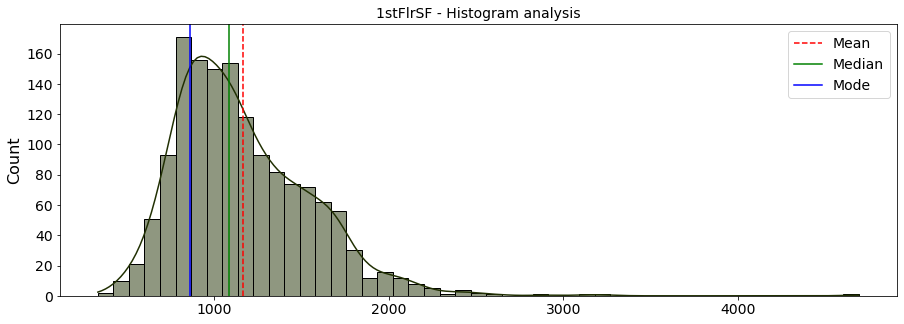

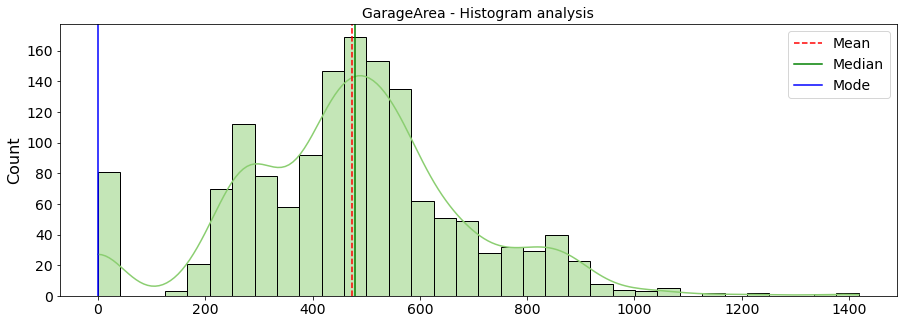

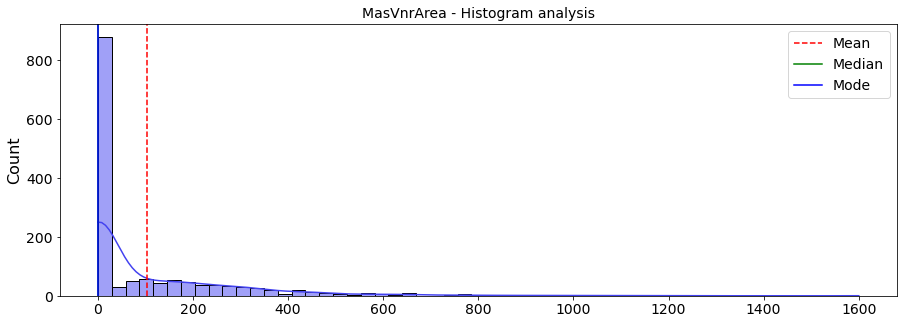

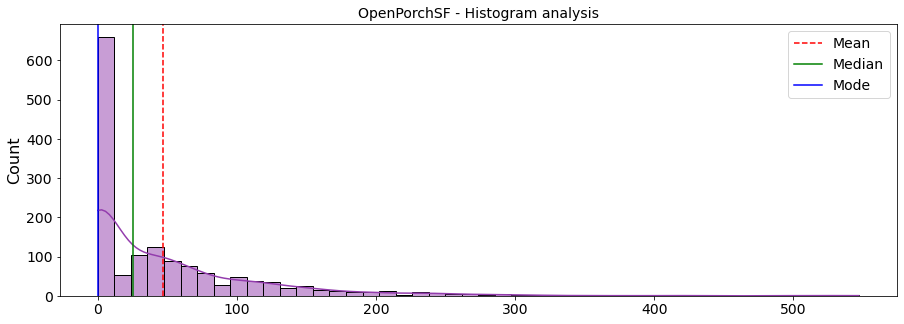

In [79]:
de.get_histplot(df_train, cols_nums)

## Categoricals

M:\09_MyApps\020_Scripts\pyscripts-common\ml-helpers\data_explore.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, (ax1) = plt.subplots(1, 1, figsize=(15, 5))


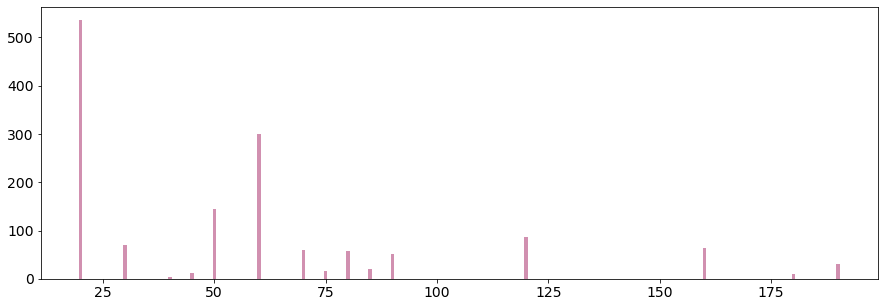

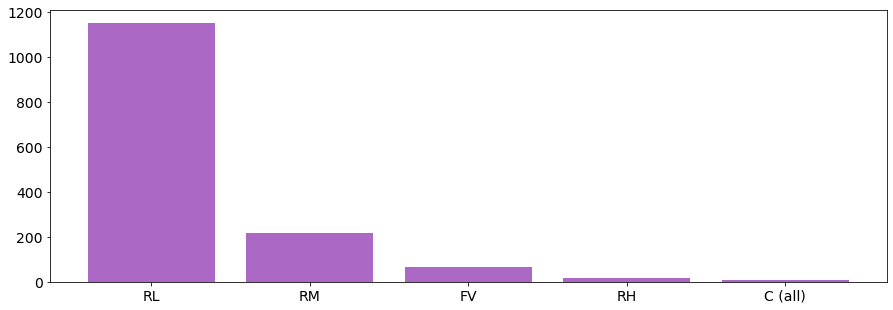

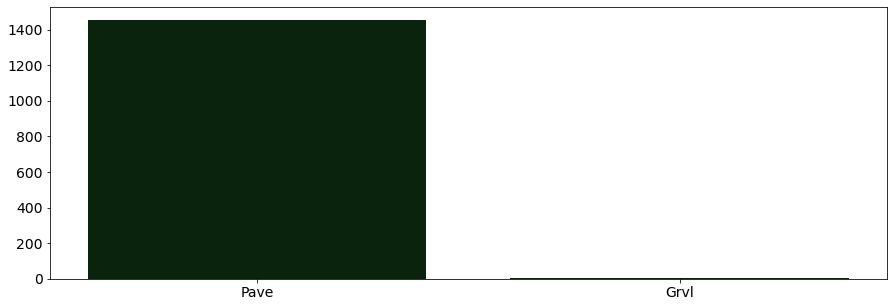

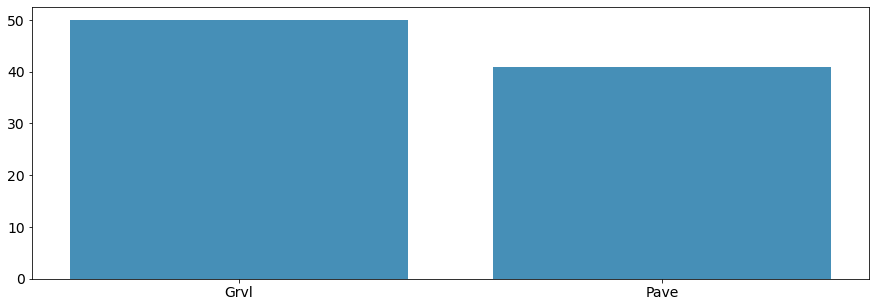

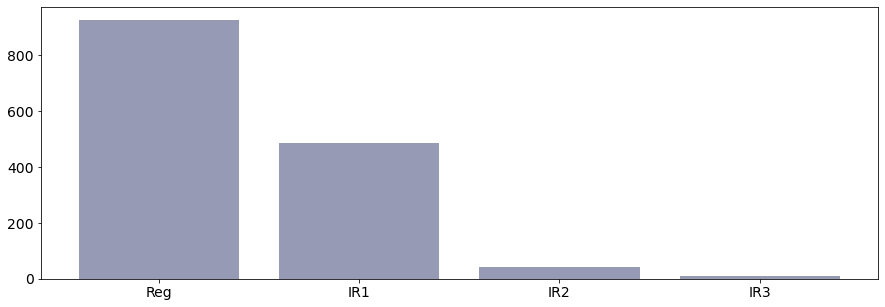

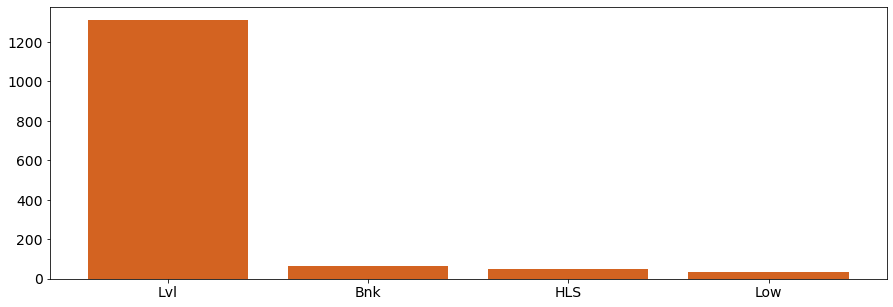

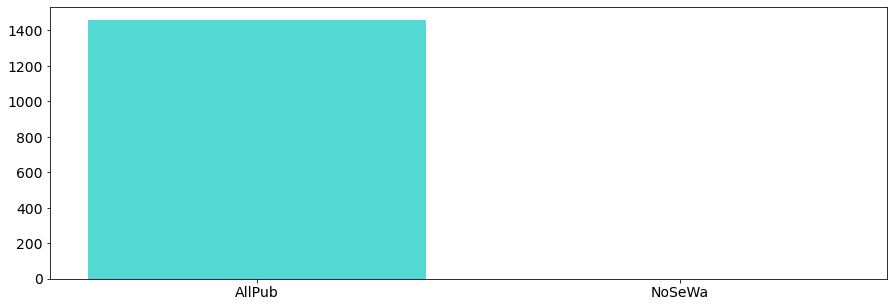

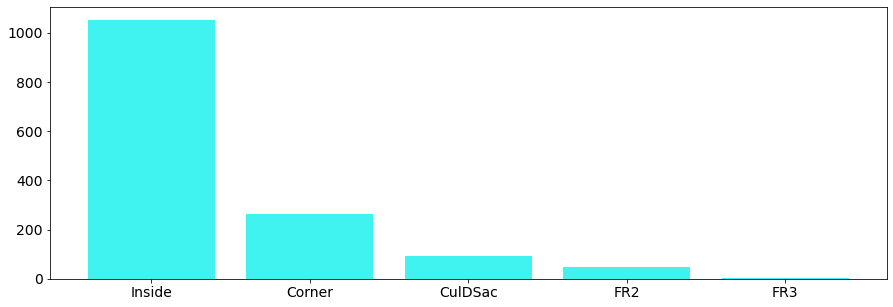

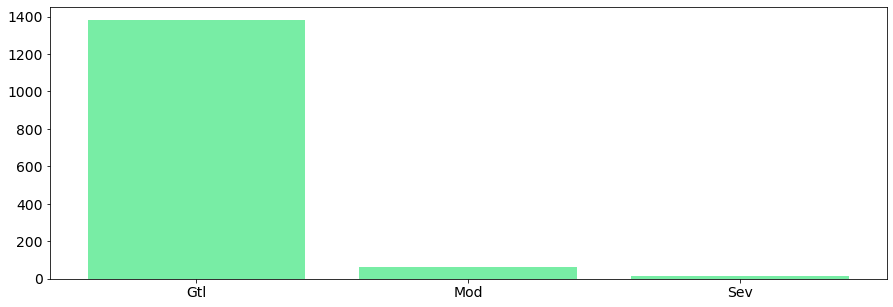

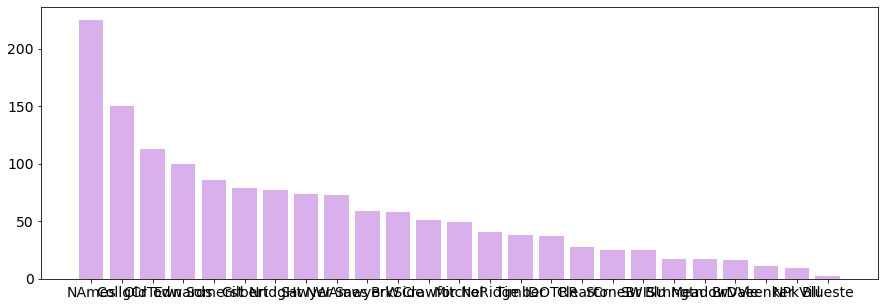

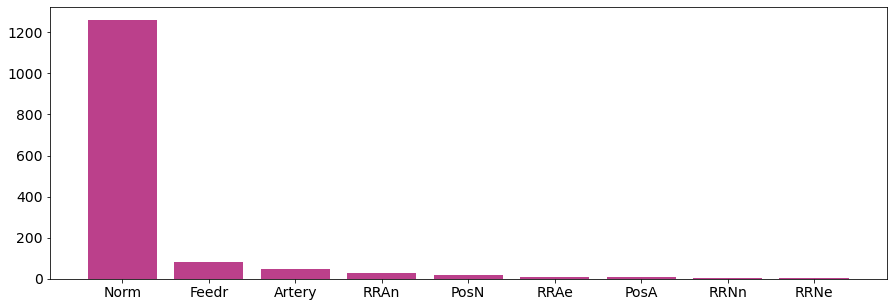

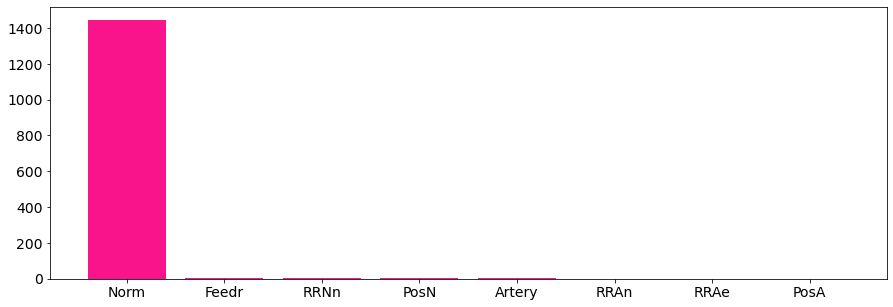

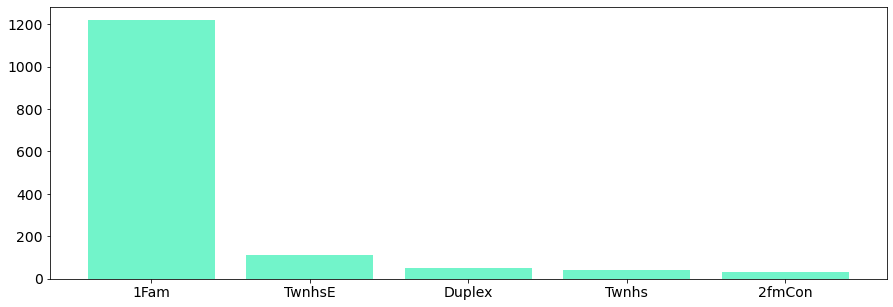

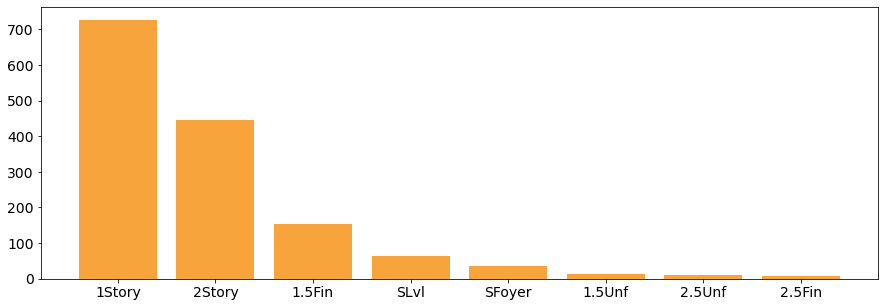

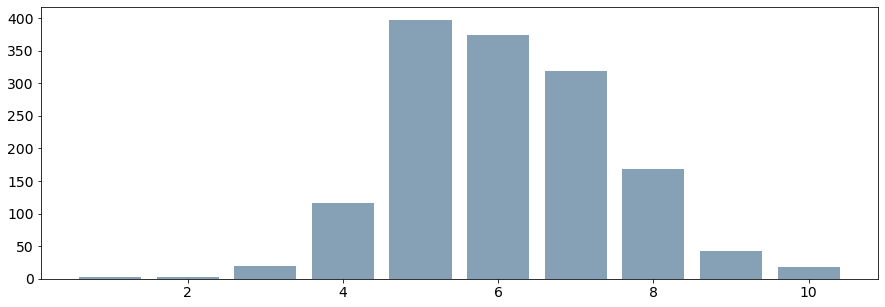

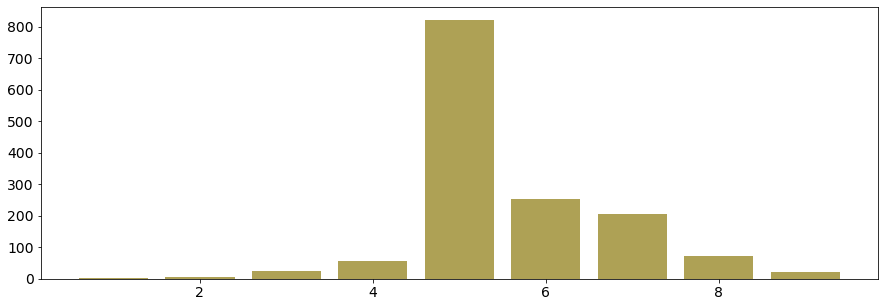

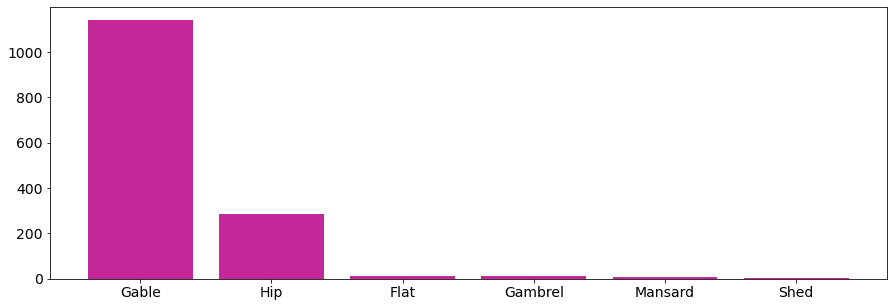

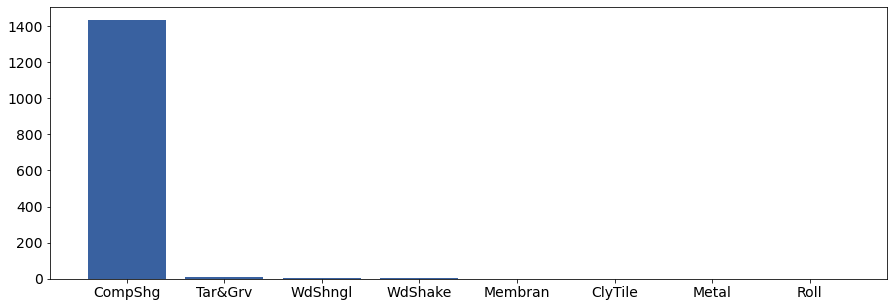

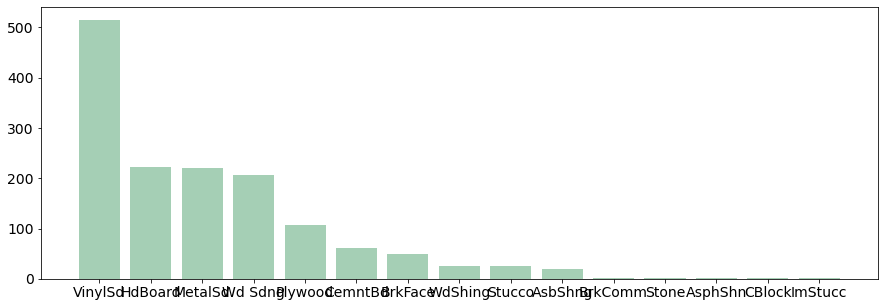

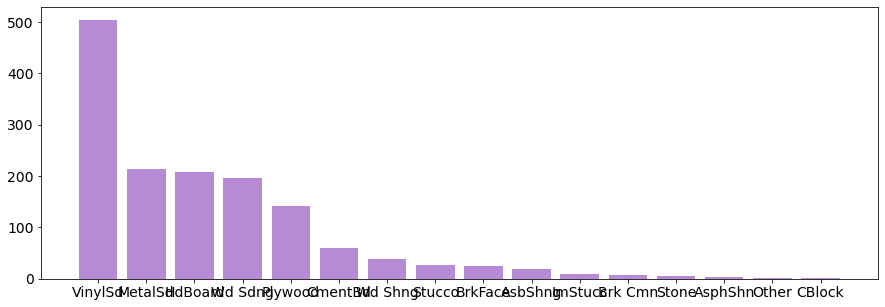

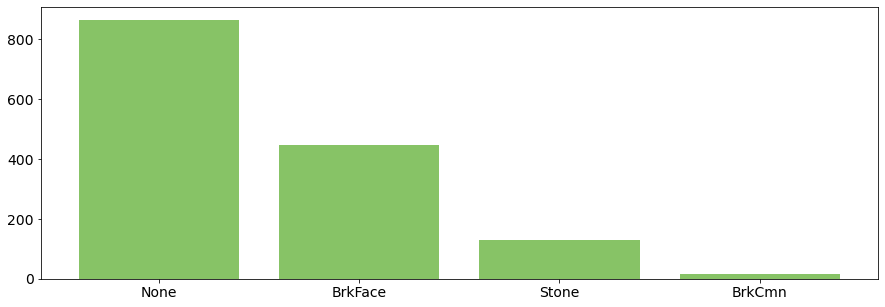

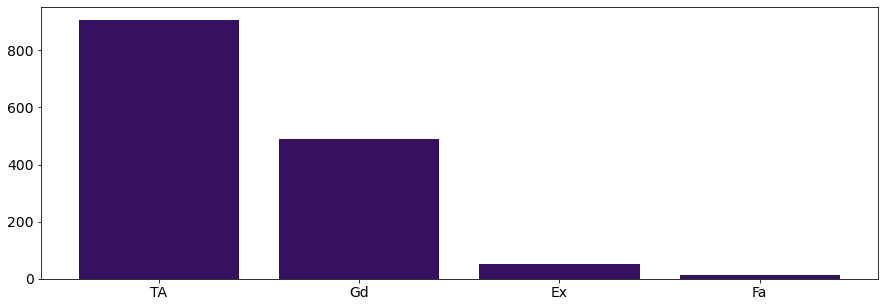

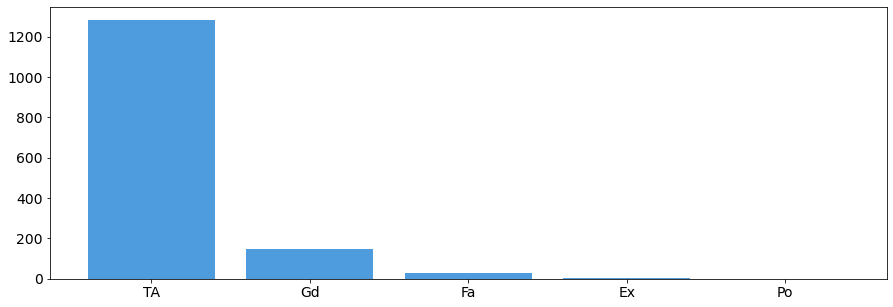

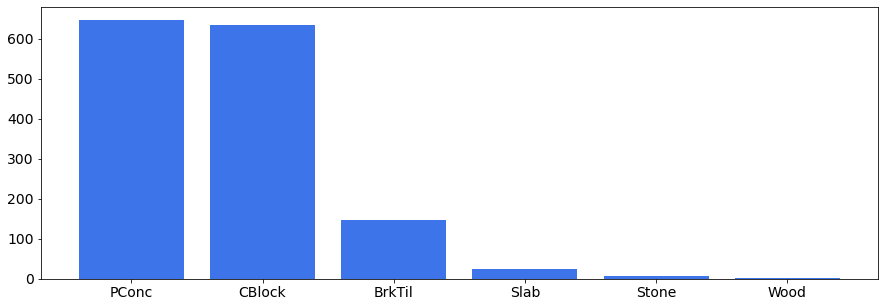

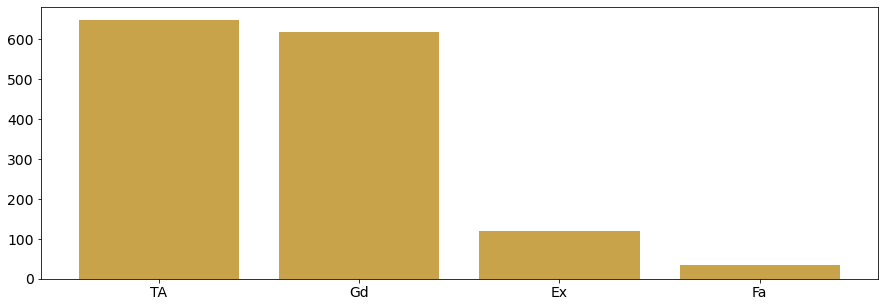

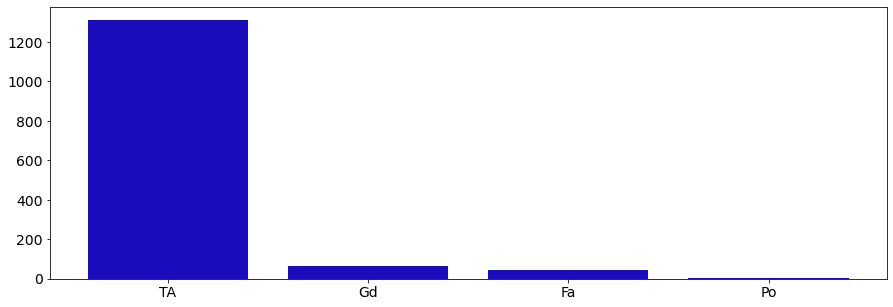

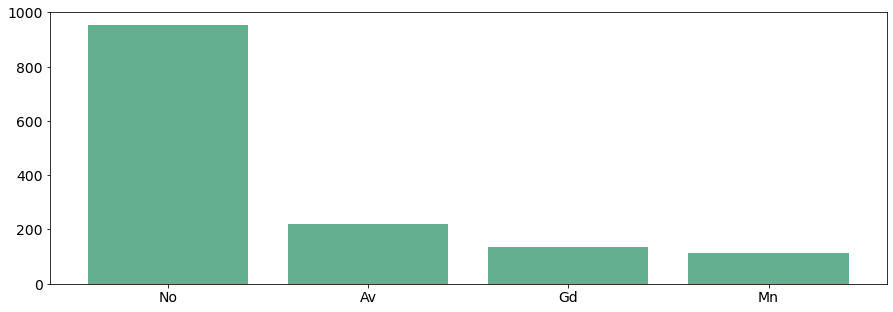

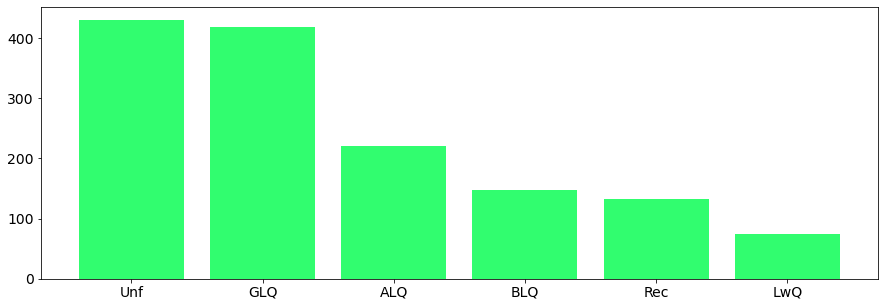

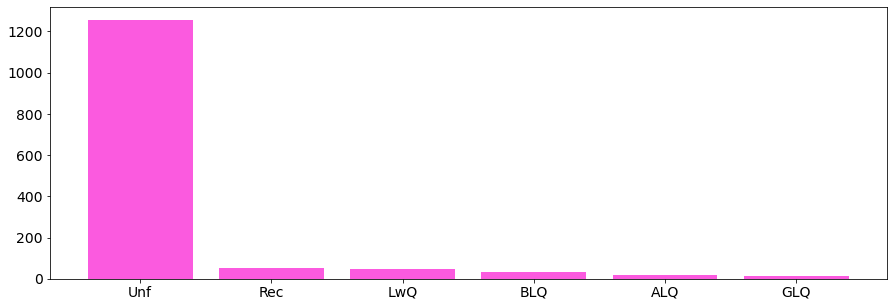

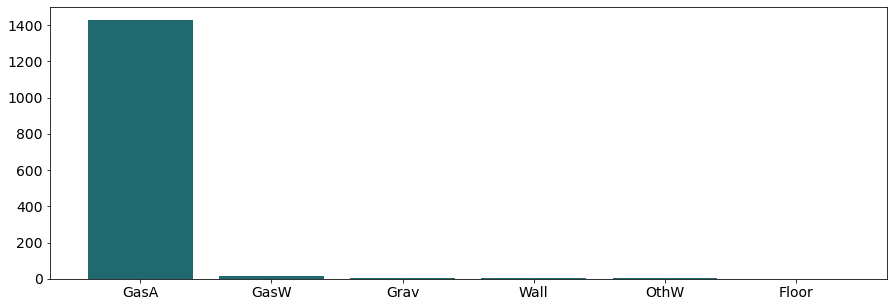

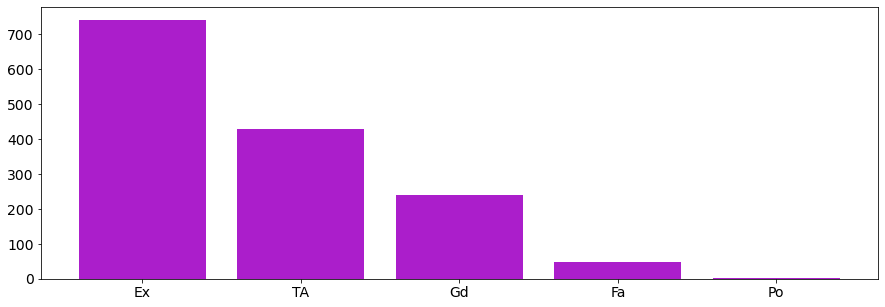

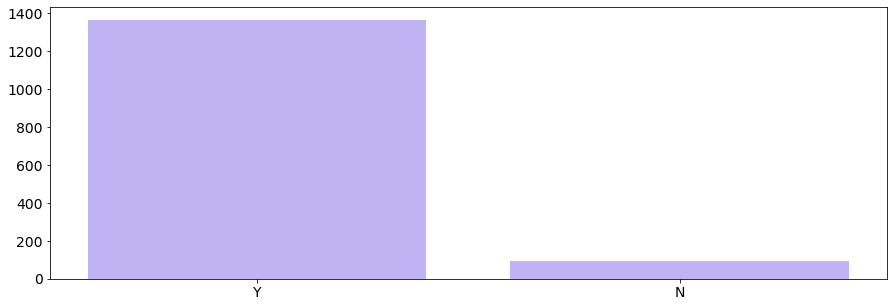

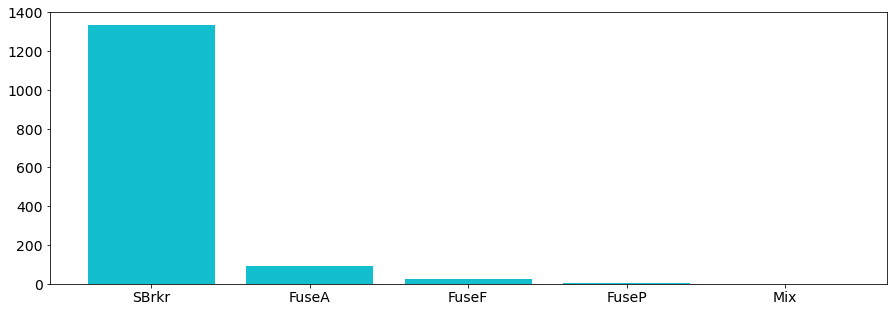

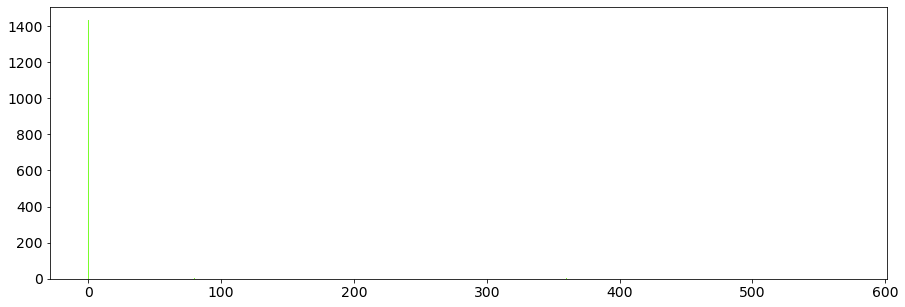

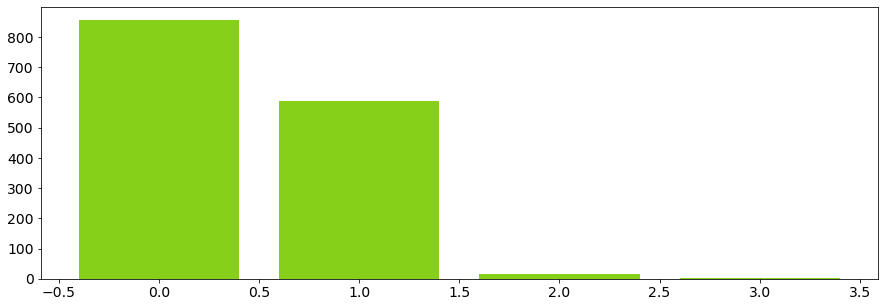

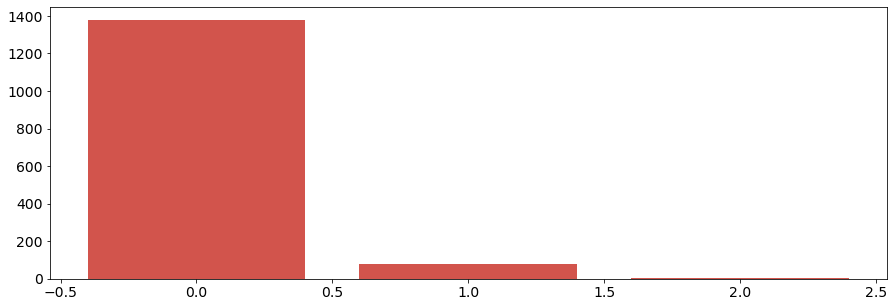

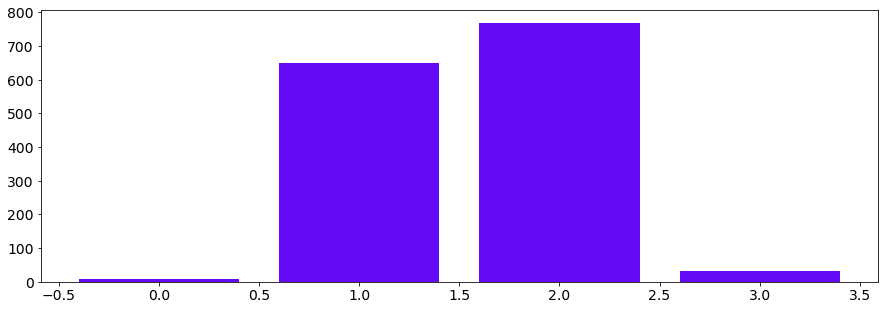

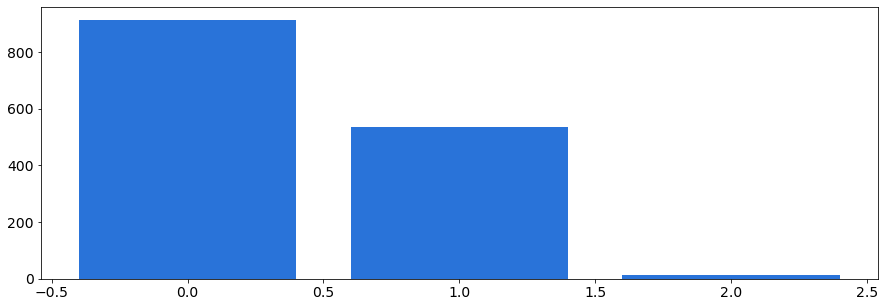

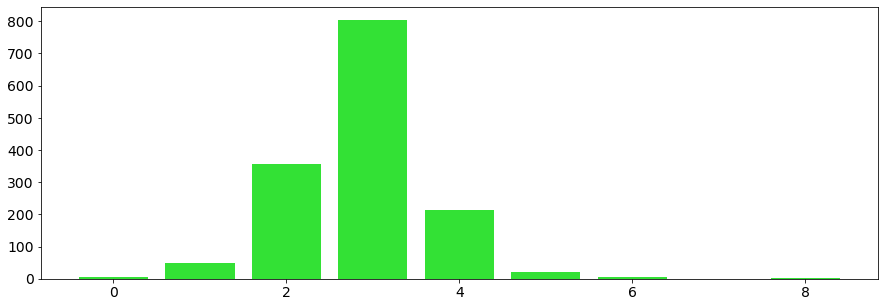

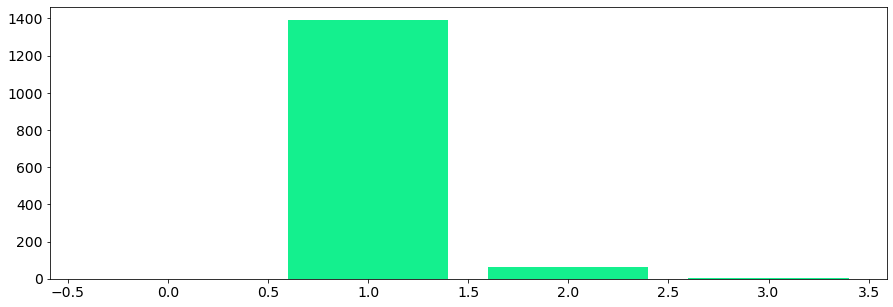

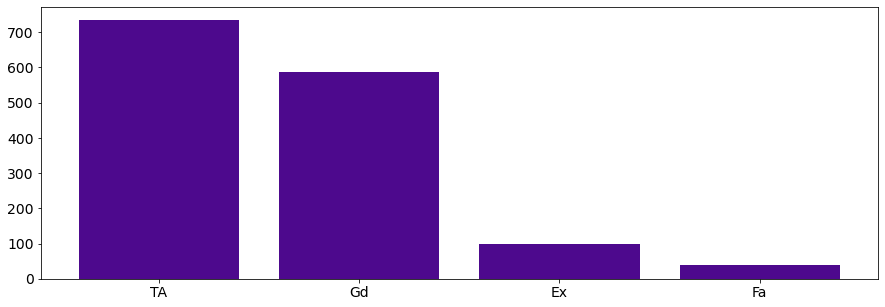

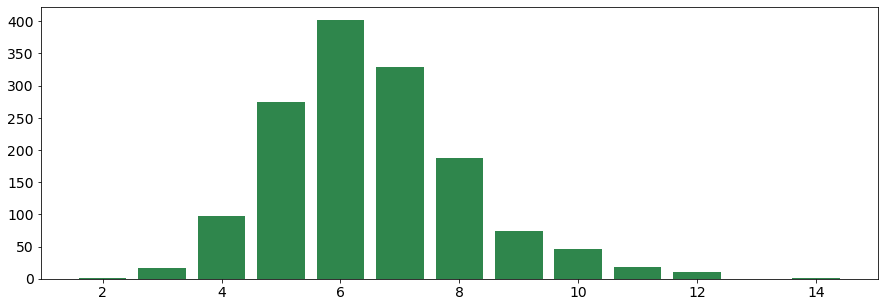

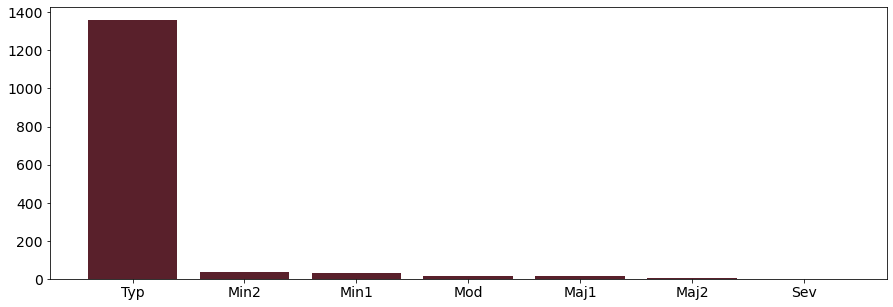

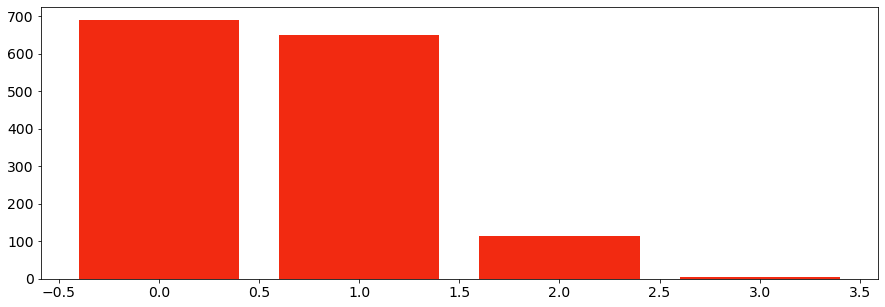

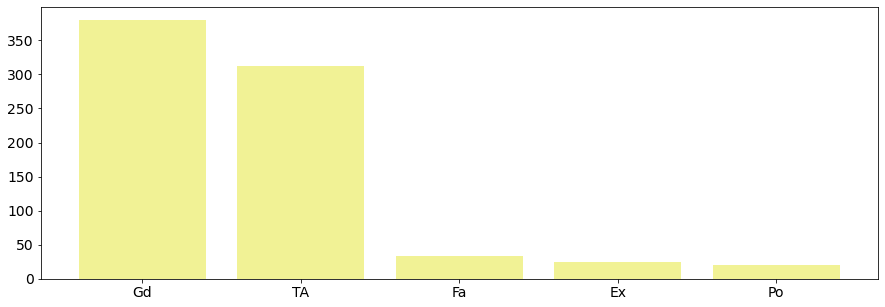

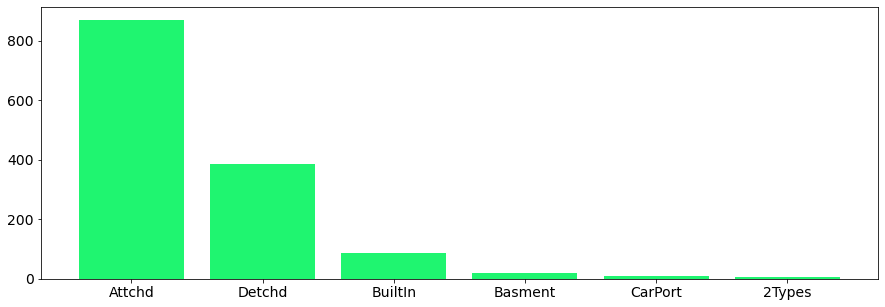

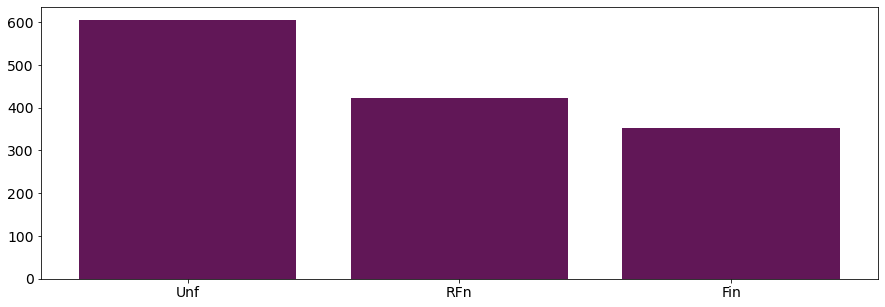

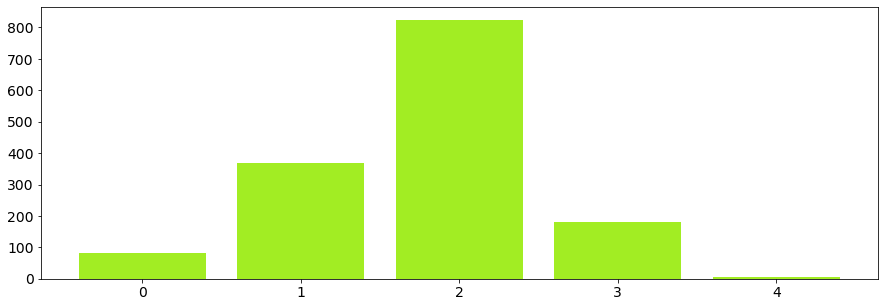

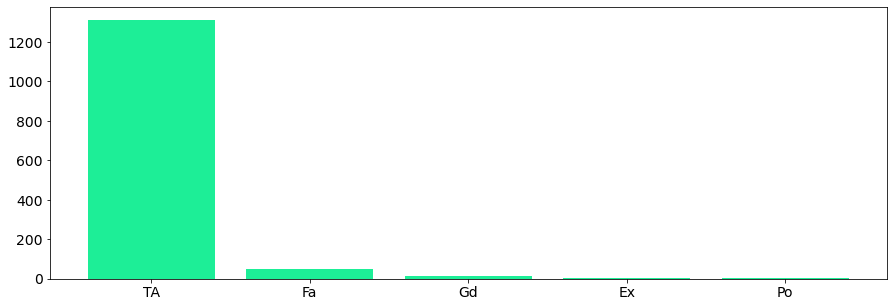

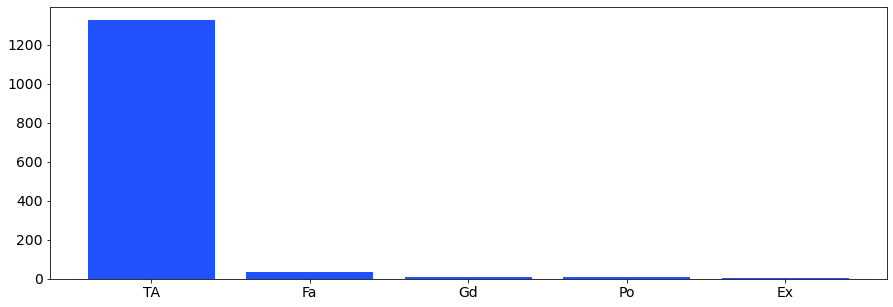

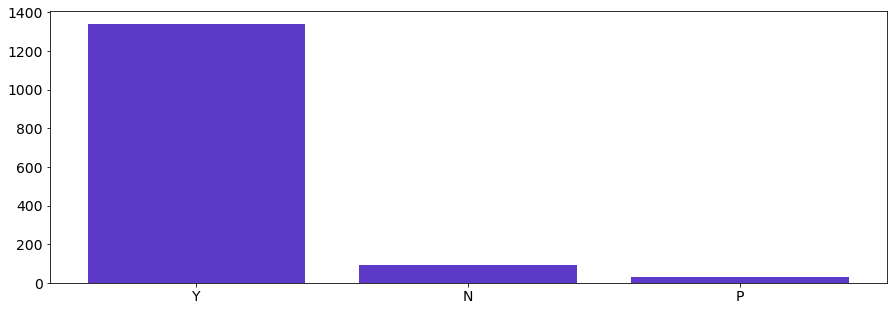

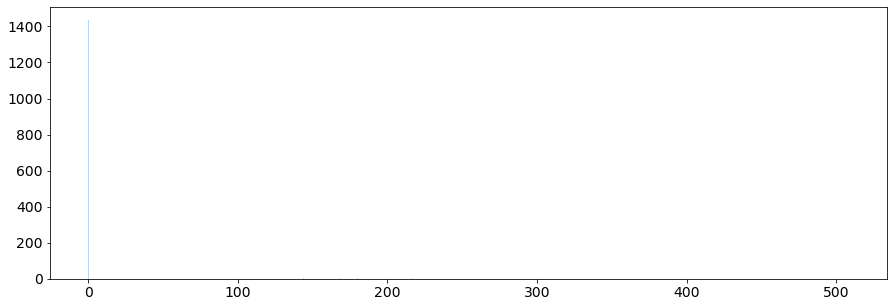

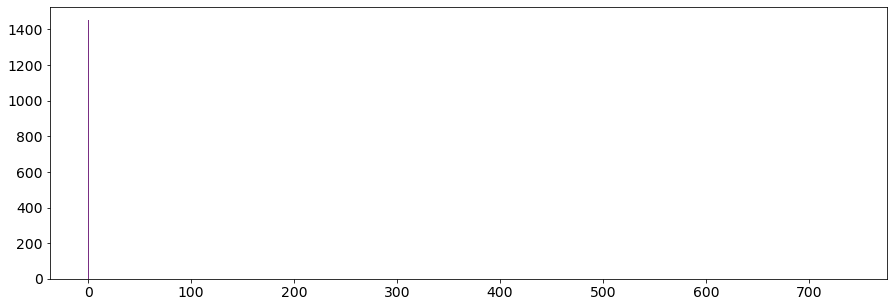

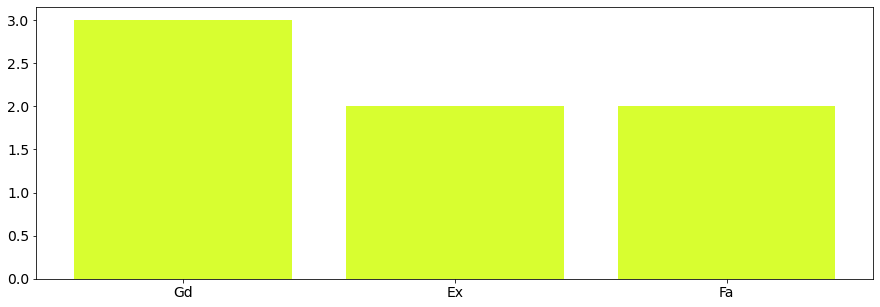

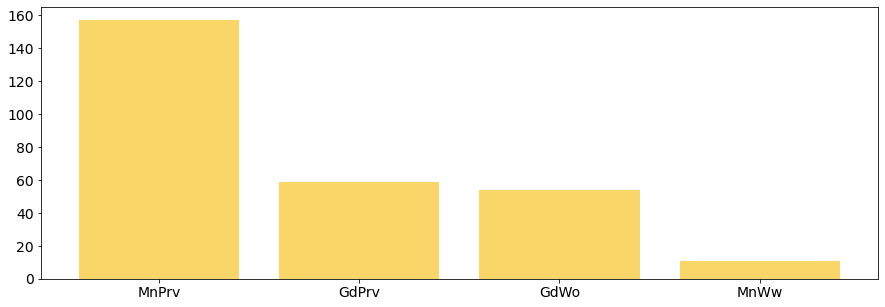

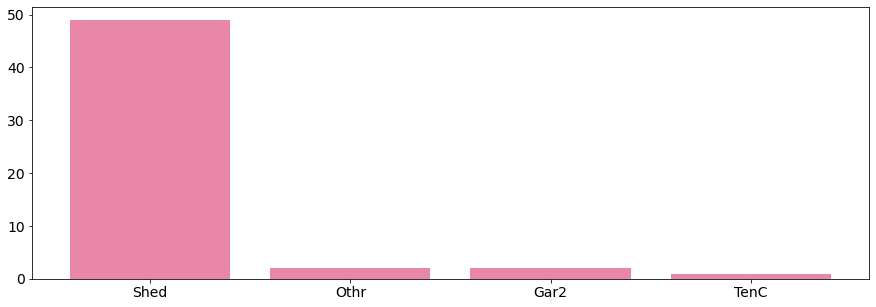

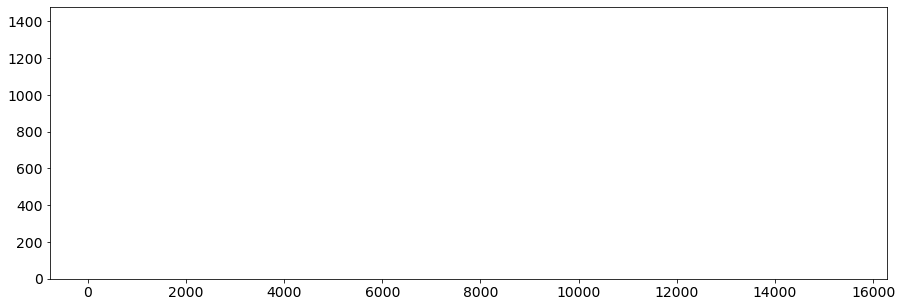

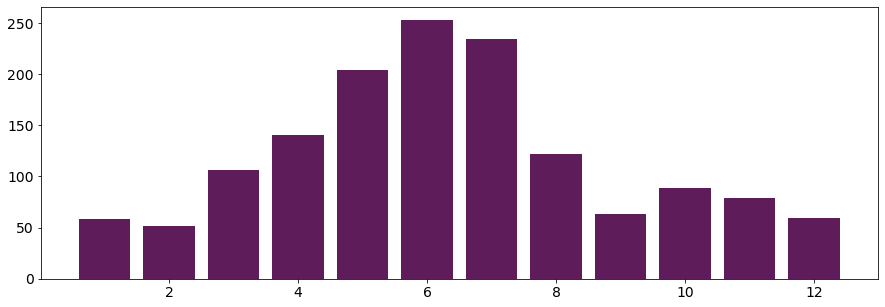

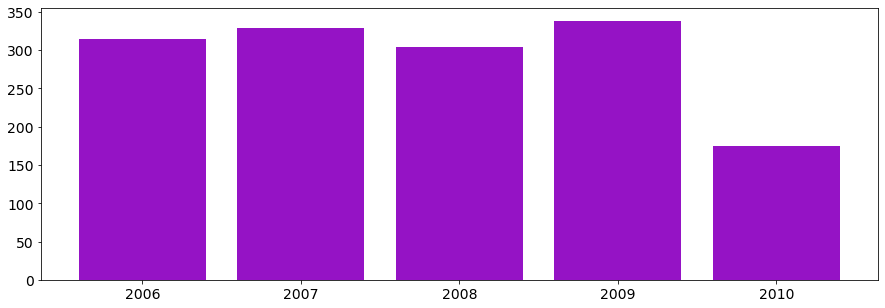

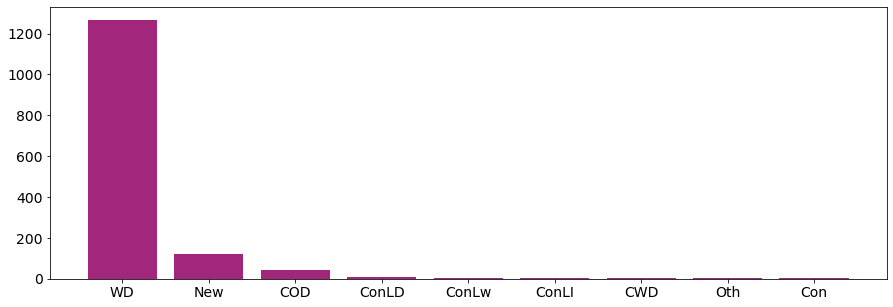

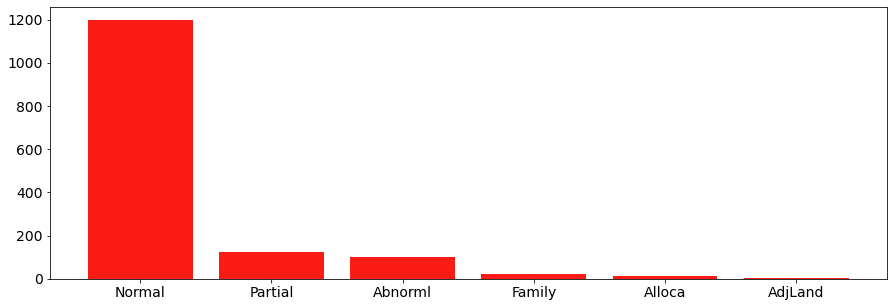

In [25]:
de.get_histplot_cat(df_train, cols_cat)

# Correlation

<Figure size 432x288 with 0 Axes>

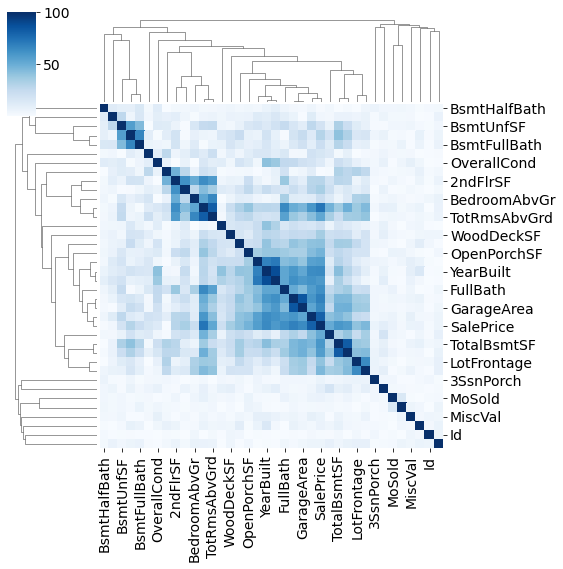

In [31]:
df_corr, _ = de.correlation_matrix(df_train, show_matrix = True)

In [38]:
de.table_color_intense(df_corr[[label]].sort_values(label, ascending=False))

,SalePrice
SalePrice,100.000000
OverallQual,80.982859
GrLivArea,73.130958
GarageCars,69.071097
YearBuilt,65.268155
GarageArea,64.937853
FullBath,63.595706
TotalBsmtSF,60.272544
GarageYrBlt,59.378833
1stFlrSF,57.540784
